In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
period=input('pls enter period analysis: w/m/q')

pls enter period analysis: w/m/qm


In [3]:
if period=='q':
    path1 = 'R:/Operations/QA/Yield Analysis/ww yield analysis1.txt'
    path2 = 'R:/Operations/QA/Yield Analysis/ww yield analysis2.txt'
    path3 = 'R:/Operations/QA/Yield Analysis/ww yield analysis3.txt'

    df1=pd.DataFrame([line.split('\t') for line in open(path1)])
    df2=pd.DataFrame([line.split('\t') for line in open(path2)])
    df3=pd.DataFrame([line.split('\t') for line in open(path3)])

    df1.columns = df1.iloc[3]
    df1 = df1.iloc[4:]
    df2.columns = df2.iloc[3]
    df2 = df2.iloc[4:]
    df3.columns = df3.iloc[3]
    df3 = df3.iloc[4:]

    df = pd.concat([df1,df2,df3])
else:
    #path = 'R:/Operations/QA/Yield Analysis/ww yield analysis.csv'
    path = 'R:/Operations/QA/Yield Analysis/ww yield analysis.txt'

    #for CSV file
    #df = pd.read_csv(path, header=3)

    #for text file
    df=pd.DataFrame([line.split('\t') for line in open(path)])
    df.columns = df.iloc[3]
    df = df.iloc[4:]

In [4]:
site= input("Enter site code: ")
pn = input("Enter the PN: ")
st = input("Enter the Station: ")


Enter site code: 1
Enter the PN: AM0206820
Enter the Station: CO2


In [5]:
df_filter=df[(df['Site']==site) & (df['Station']==st) & (df['PN']==pn)]         

In [6]:
df_filter.rename(columns={'Parameters\n':'Parameters'}, inplace=True)

C:\Users\kobi_z\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
Results=[]
for pc in df_filter['PC'].unique():
    df_filter_pc=df_filter[(df_filter['PC']==pc)]
    units=0
    first_pass=0
    total_pass=0
    for sn in df_filter_pc['SN'].unique():
        df_filter_pc_sn=df_filter_pc[(df_filter_pc['SN']==sn)]
        if (len(df_filter_pc_sn['Test ID'].unique())==1)&(df_filter_pc_sn['Result'].unique()[0]=='pass'):
            first_pass+=1
            total_pass+=1
            units+=1
        else:
            if 'pass' in df_filter_pc_sn['Result'].unique():
                total_pass+=1
                units+=1
            else:
                units+=1
    Results.append([pc,units,first_pass,total_pass])
    

In [9]:
df_results=pd.DataFrame(Results,columns=['Station','Total Units','First Pass Units','Total Pass Units'])

In [10]:
df_results['FTY']=df_results['First Pass Units']/df_results['Total Units']*100
df_results['Yield']=df_results['Total Pass Units']/df_results['Total Units']*100
df_results['NFF']=df_results['Yield']-df_results['FTY']
df_results['NFF per Failure']=(df_results['Total Pass Units']-df_results['First Pass Units'])/(df_results['Total Units']-df_results['First Pass Units'])*100

# Station analysis by tests

In [12]:
test_station_results=[]
for test in df_filter['Test name'].unique():
    df_filter_test=df_filter[(df_filter['Test name']==test)]
    for pc in df_filter['PC'].unique():
        df_filter_test_pc=df_filter_test[(df_filter_test['PC']==pc)]
        unit_pass=0
        unit_fail=0
        for test_result in df_filter_test_pc['Test result']:
            if test_result=='Pass':
                unit_pass+=1
            else:
                unit_fail+=1 
                    
        test_station_results.append([test,pc,unit_pass,unit_fail])

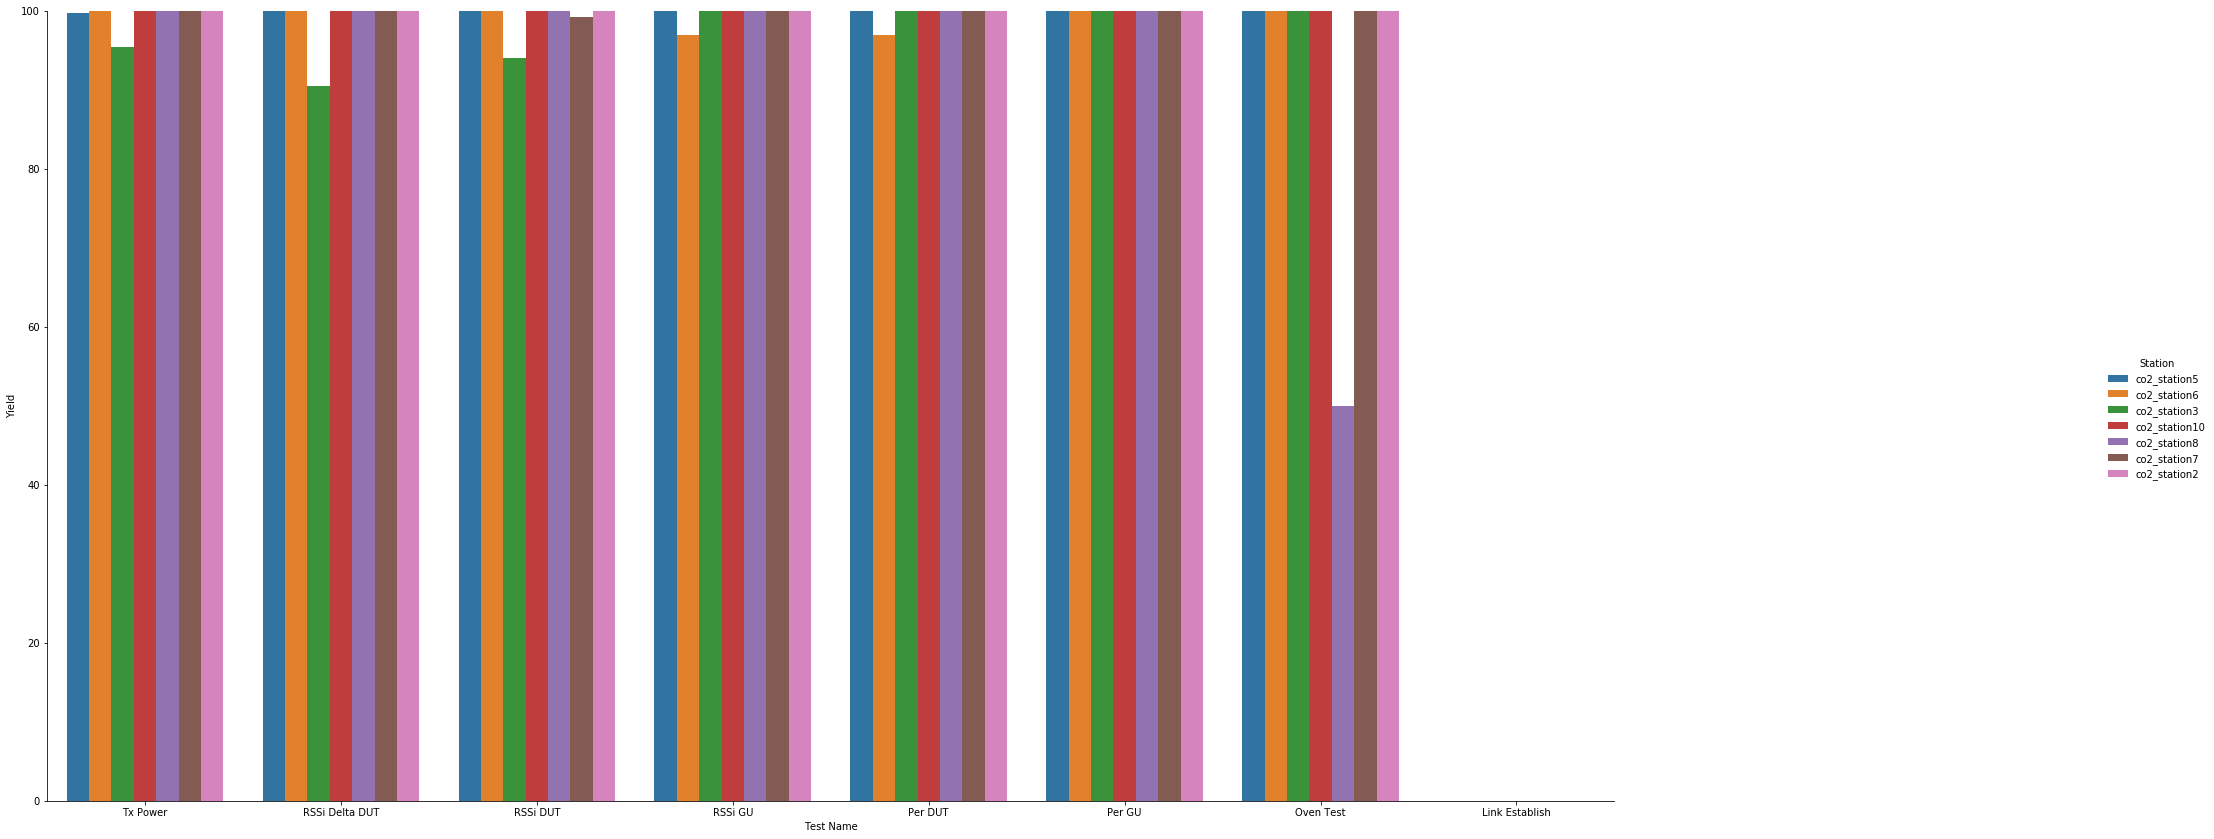

In [13]:
test_station_results_df=pd.DataFrame(test_station_results)
test_station_results_df.rename(columns={0:'Test Name',1:'Station',2:'num of pass',3:'num of fail'}, inplace=True)
test_station_results_df['Yield']=100*test_station_results_df['num of pass']/(test_station_results_df['num of pass']+test_station_results_df['num of fail'])
#test_station_results_df.to_csv('R:/Operations/QA/Yield Analysis/Quarterly analysis/test analysis by station.csv')

g = sns.catplot(x="Test Name", y="Yield",hue="Station",data=test_station_results_df, kind="bar");
ymin=test_station_results_df['Yield'].min()
g.set(ylim=(ymin,100))
g.fig.set_size_inches(35,13)

In [14]:
if st=='CO2':
    new=df_filter['Parameters'].str.split(",|:", n = 30, expand = True)
    df_filter['Temperature']=new[1]
    df_filter['Frequency']=new[5]
    df_filter['CH']=new[9]
    df_filter['mPCi AP']=new[13]
    df_filter['Temp Cat']=np.where(df_filter['Temperature'].astype('float')>=40, 'High',np.where(df_filter['Temperature'].astype('float')<=0,"Low","Medium"))
    
            
elif (st=='FUNCT'):
    new=df_filter['Parameters'].str.split(",|:", n = 30, expand = True)
    df_filter['Frequency']=new[1]
    df_filter['Rate']=new[3]
    df_filter['BW']=new[5]
    df_filter['CH']=new[7]
    
            
elif  (st=='ANTCAL'):
    new=df_filter['Parameters'].str.split(",|:", n = 30, expand = True)
    df_filter['Frequency']=new[1]
    df_filter['TX Power']=new[3]
    df_filter['FEM']=new[5]
    df_filter['RF CH']=new[7]
    df_filter['Phase']=new[9]
    df_filter['ANT Mode']=new[11]
    df_filter['Position']=new[13]
    
elif (st=='CAL'):
    new=df_filter['Parameters'].str.split(",|:", n = 30, expand = True)
    df_filter['CBW']=new[1]
    df_filter['Frequency']=new[3]
    df_filter['Chain']=new[5]
    df_filter['Gain']=new[7]
    df_filter['Tested Power']=new[9]
    
            
            
elif (st=='SYSTEM'):
    new=df_filter['Parameters'].str.split(",|:", n = 30, expand = True)
    df_filter['BW']=new[1]
    df_filter['DC']=new[3]
    df_filter['Frequency']=new[5]
    df_filter['Mode']=new[7]
    
            
            
elif (st=='FTL'):
    new=df_filter['Parameters'].str.split(",|:", n = 30, expand = True)
    df_filter['BW']=new[3]
    df_filter['Frequency']=new[5]
    df_filter['Rate']=new[7]
    df_filter['CH']=new[9]
        

C:\Users\kobi_z\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kobi_z\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\kobi_z\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

# General Analysis

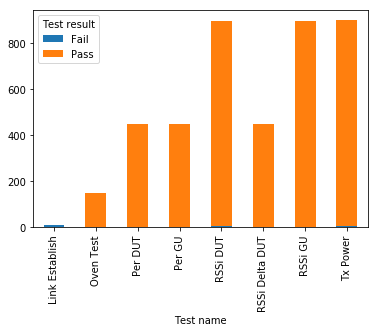

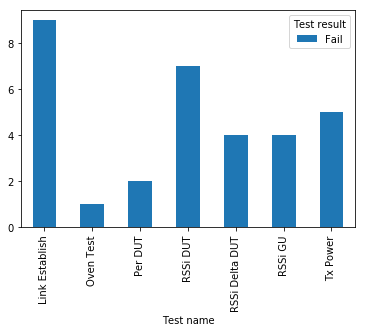

In [16]:

props = df_filter.groupby("Test name")['Test result'].value_counts(normalize=False).unstack()
props.plot(kind='bar', stacked='True')
df_filter_fail=df_filter[df_filter['Test result']=='Fail']
props2 = df_filter_fail.groupby("Test name")['Test result'].value_counts(normalize=False).sort_values(ascending=False).unstack()
props2.plot(kind='bar', stacked='True')


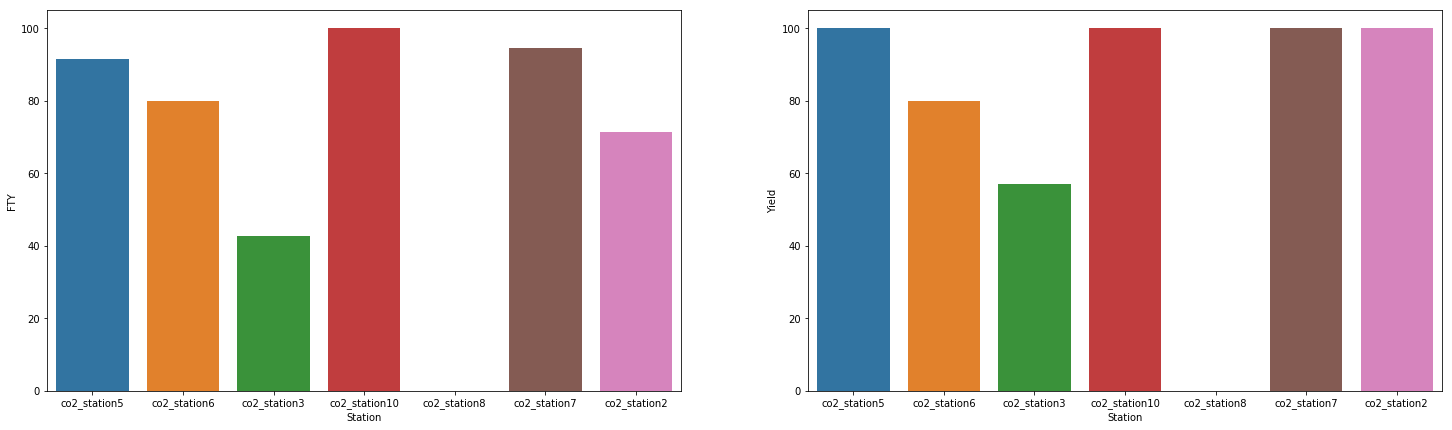

In [17]:

fig = plt.figure()
fig.set_size_inches(25,7)

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x="Station", y="FTY", data=df_results)

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.barplot(x="Station", y="Yield", data=df_results)


# Categories Count Analysis

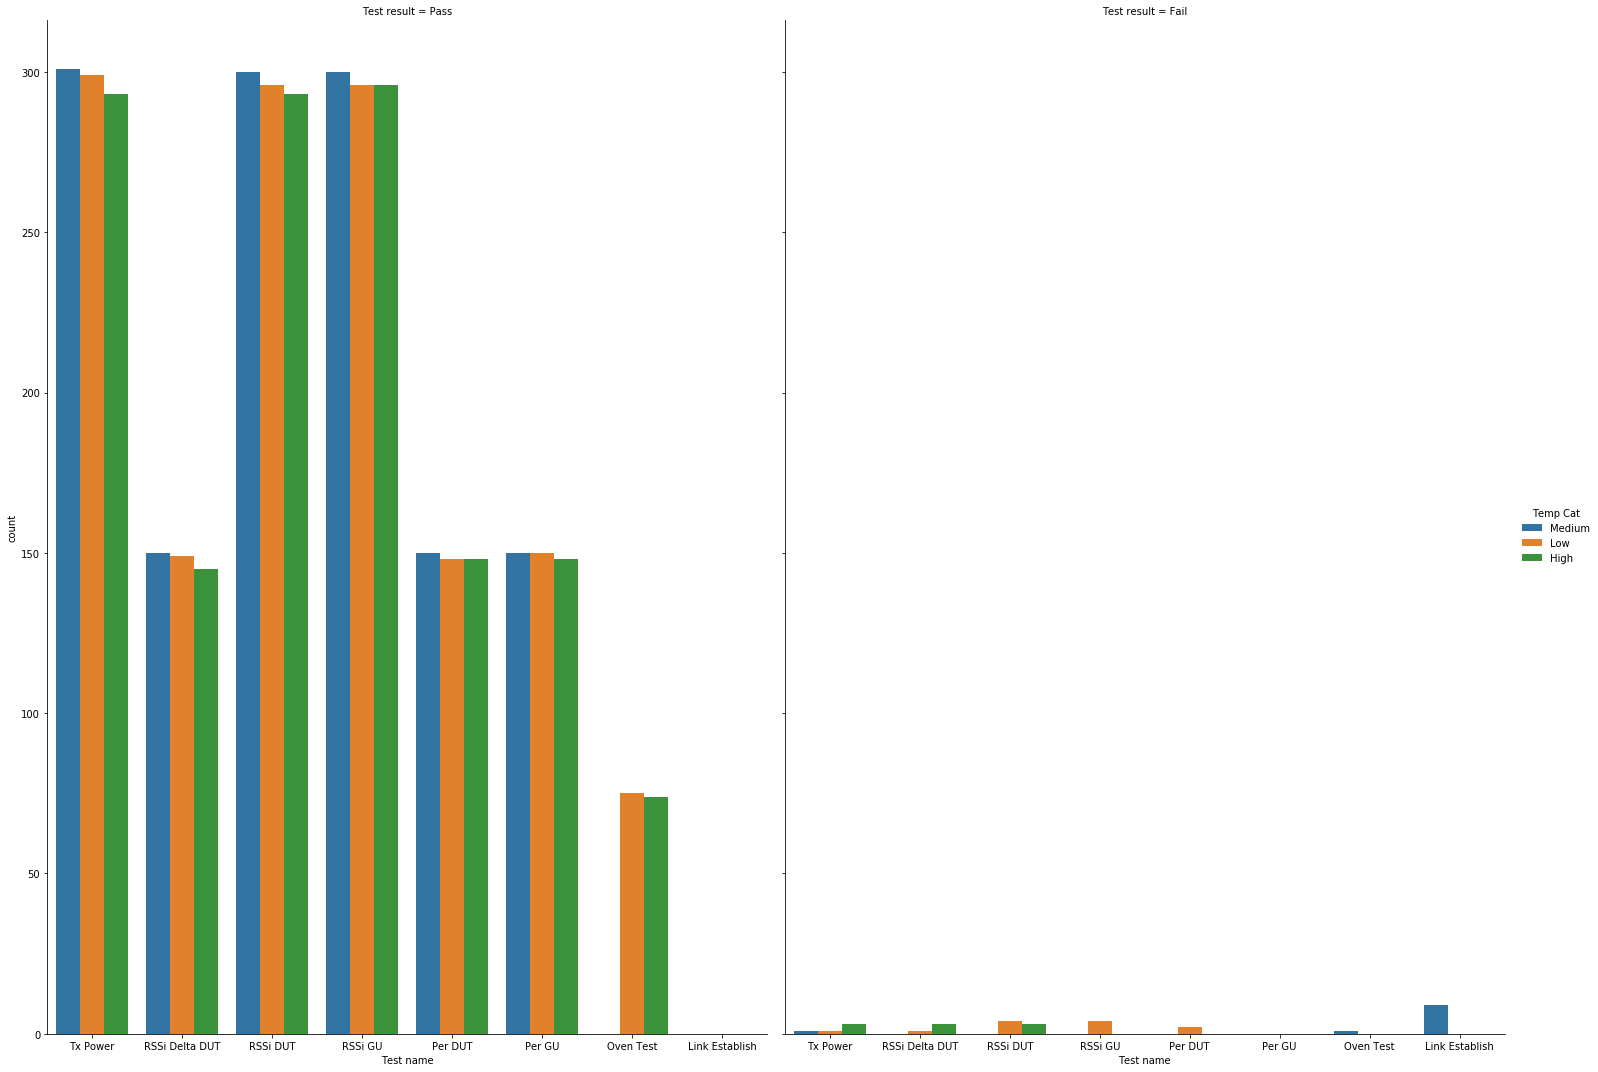

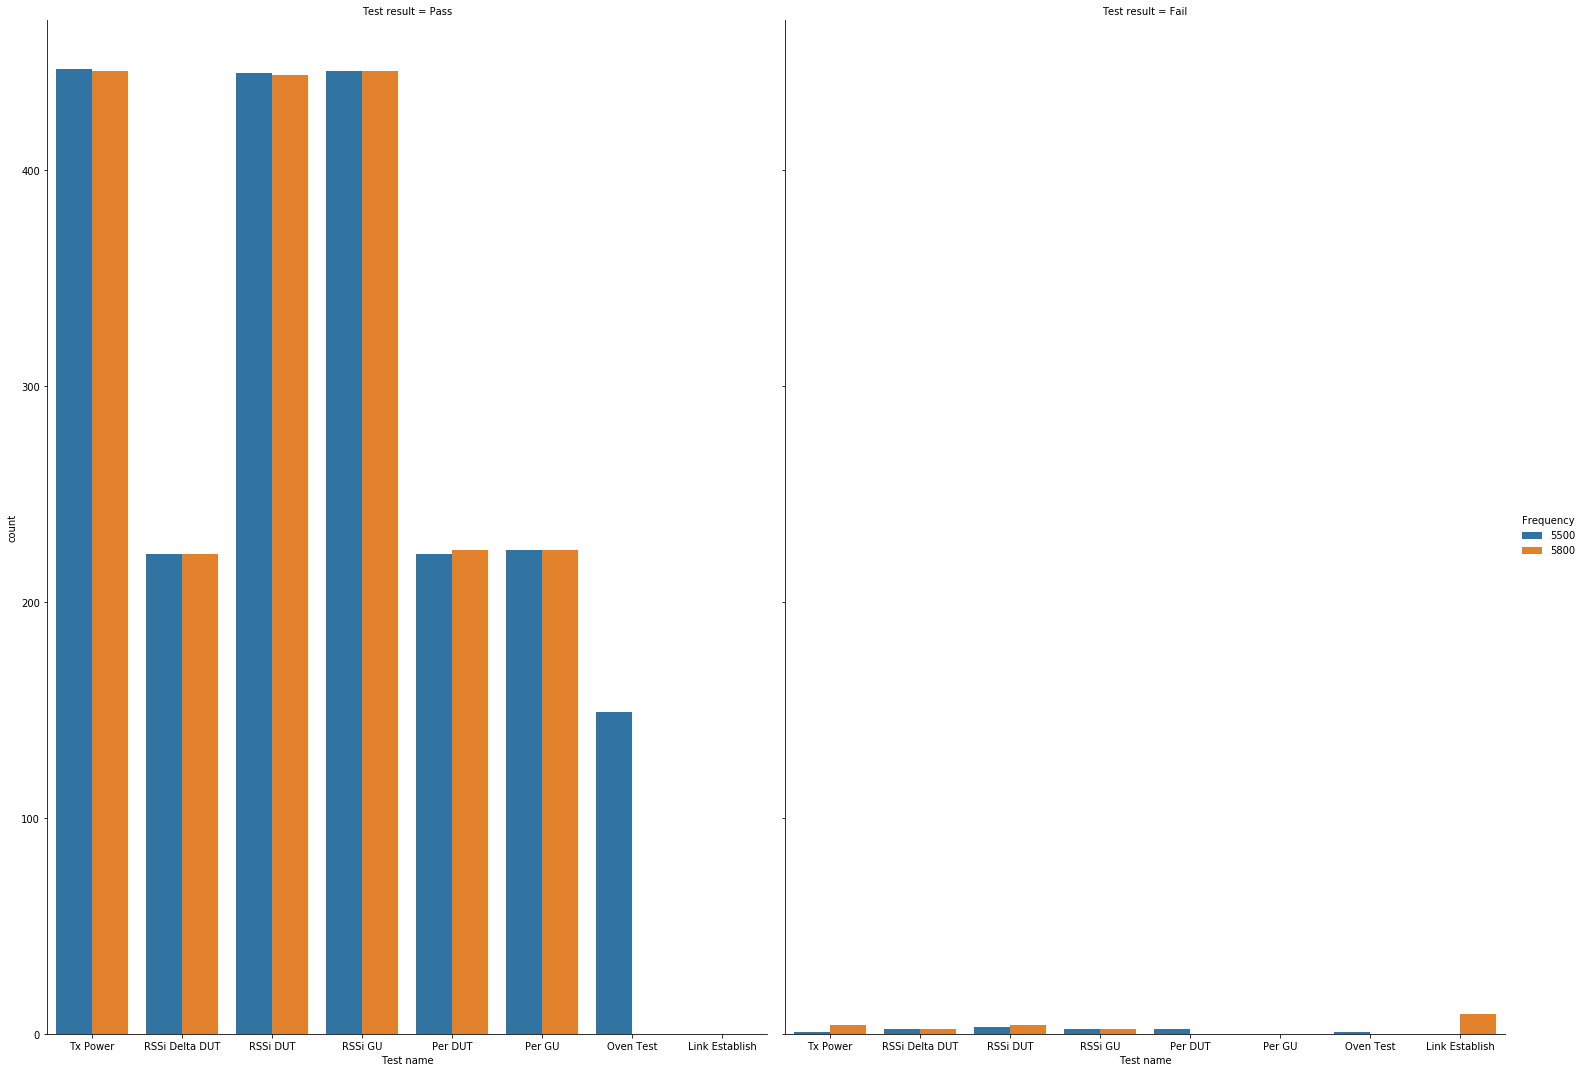

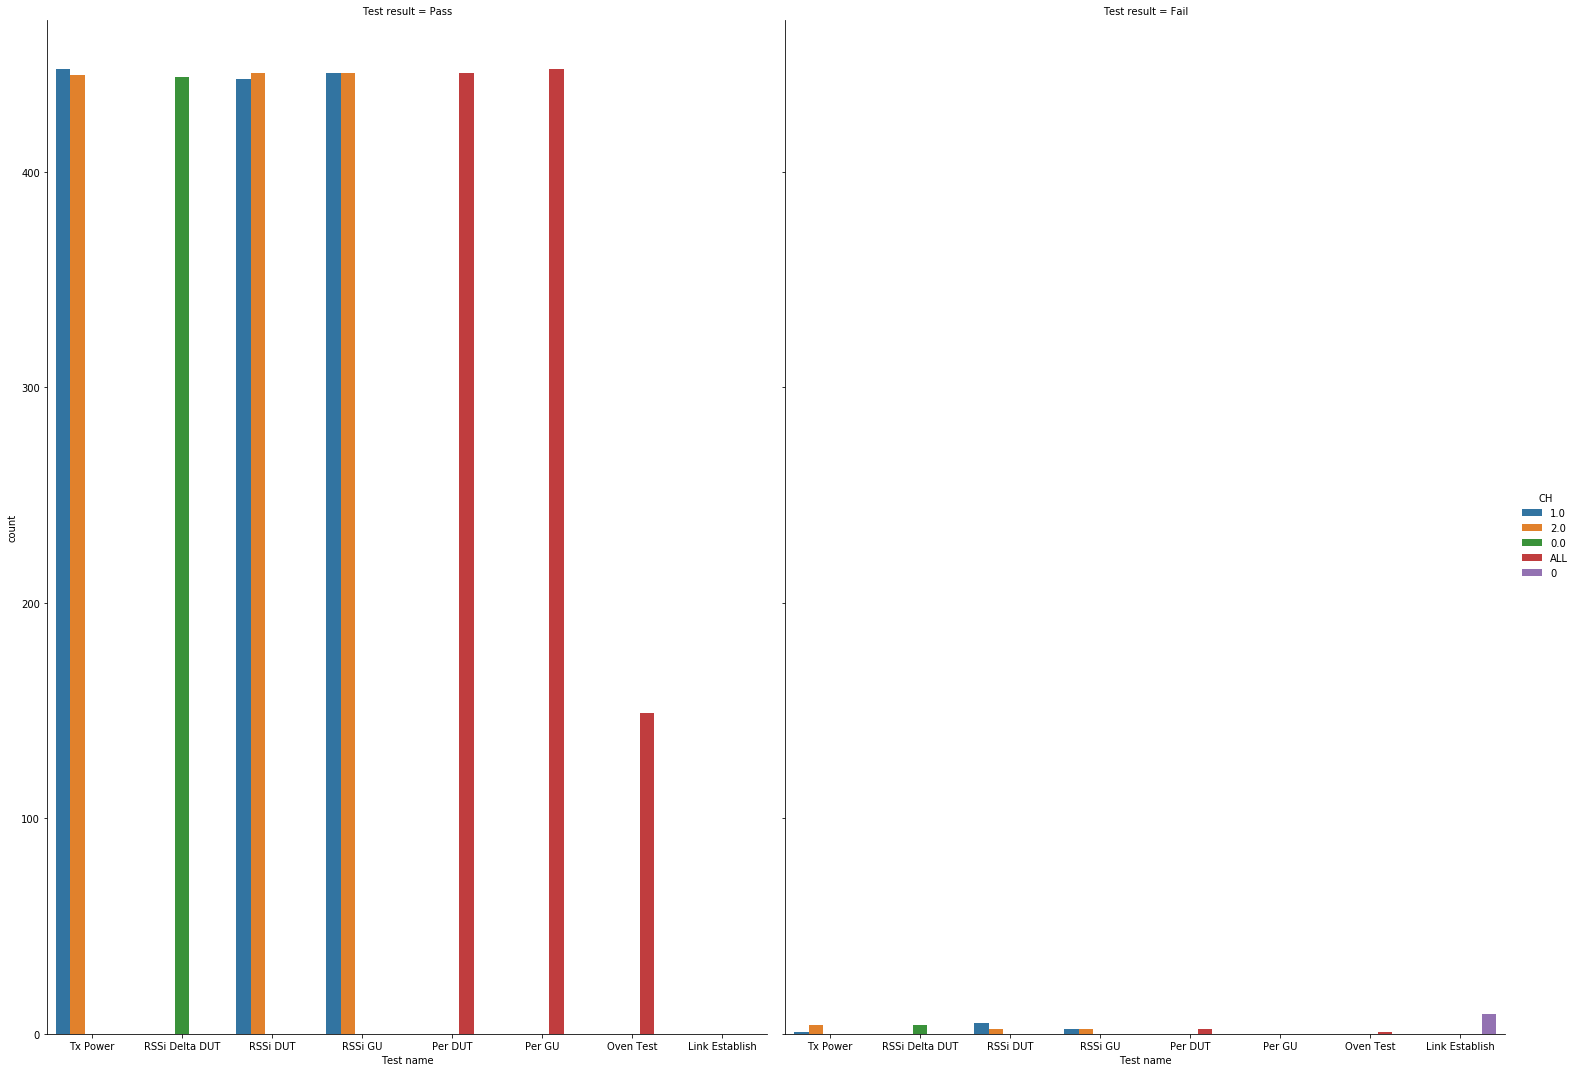

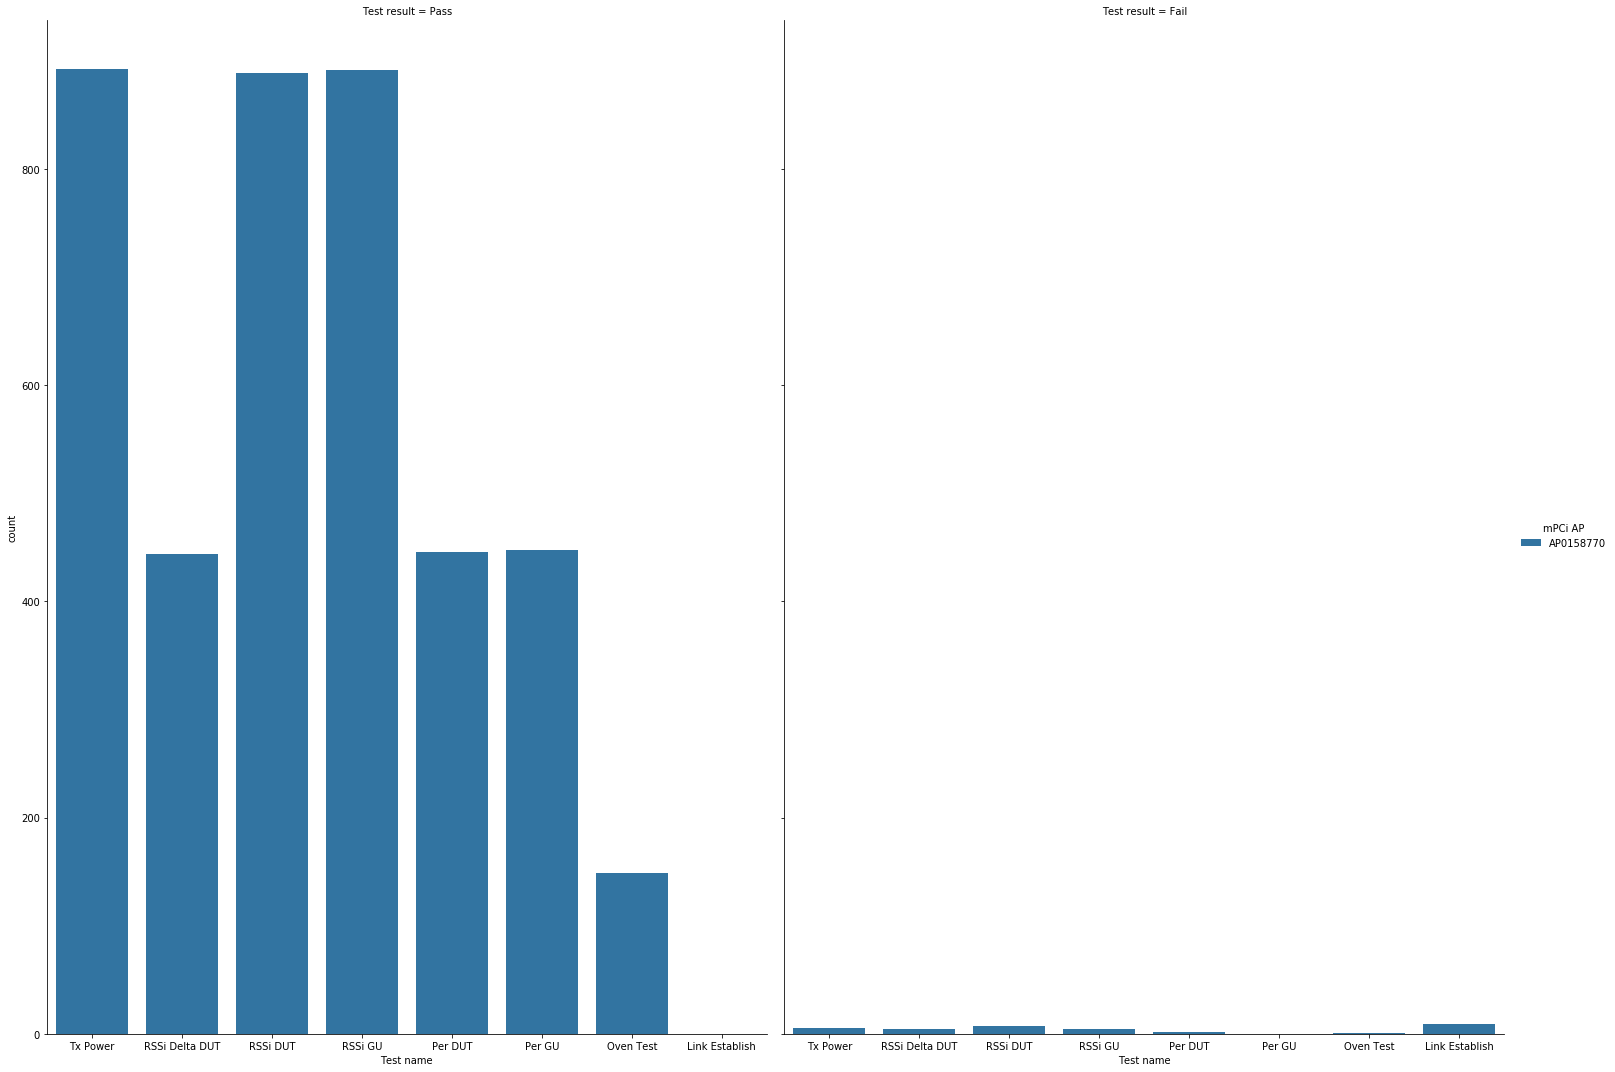

In [18]:
if (st=='CO2'):
    g1 = sns.catplot(x="Test name", hue="Temp Cat", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g2 = sns.catplot(x="Test name", hue="Frequency", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g3 = sns.catplot(x="Test name", hue="CH", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g4 = sns.catplot(x="Test name", hue="mPCi AP", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)

elif (st=='FUNCT'):
    g1 = sns.catplot(x="Test name", hue="Frequency", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g2 = sns.catplot(x="Test name", hue="Rate", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g3 = sns.catplot(x="Test name", hue="BW", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g4 = sns.catplot(x="Test name", hue="CH", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)

elif (st=='ANTCAL'):
    g1 = sns.catplot(x="Test name", hue="Frequency", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g2 = sns.catplot(x="Test name", hue="TX Power", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g3 = sns.catplot(x="Test name", hue="FEM", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g4 = sns.catplot(x="Test name", hue="RF CH", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g5 = sns.catplot(x="Test name", hue="Phase", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g6 = sns.catplot(x="Test name", hue="ANT Mode", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g7 = sns.catplot(x="Test name", hue="Position", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    
elif (st=='CAL'):
    g1 = sns.catplot(x="Test name", hue="CBW", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g2 = sns.catplot(x="Test name", hue="Frequency", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g3 = sns.catplot(x="Test name", hue="Chain", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g4 = sns.catplot(x="Test name", hue="Gain", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g5 = sns.catplot(x="Test name", hue="Tested Power", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)

elif (st=='SYSTEM'):
    g1 = sns.catplot(x="Test name", hue="BW", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g2 = sns.catplot(x="Test name", hue="DC", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g3 = sns.catplot(x="Test name", hue="Frequency", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g4 = sns.catplot(x="Test name", hue="Mode", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)

    
elif (st=='FTL'):
    g1 = sns.catplot(x="Test name", hue="BW", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g2 = sns.catplot(x="Test name", hue="Frequency", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g3 = sns.catplot(x="Test name", hue="Rate", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)
    g4 = sns.catplot(x="Test name", hue="CH", col="Test result",data=df_filter, kind="count",height=15, aspect=.7)


# ANOVA

In [19]:
tests=df_filter['Test name'].unique().tolist()
CO2_cat=['Frequency','CH','mPCi AP','Temp Cat']
FUNCT_cat=['Frequency','Rate','BW','CH']
ANTCAL_cat=['Frequency','TX Power','FEM','RF CH','Phase','ANT Mode','Position']
CAL_cat=['CBW','Frequency','Chain','Gain','Tested Power']
SYSTEM_cat=['BW','DC','Frequency','Mode']
FTL_cat=['BW','Frequency','Rate','CH']


In [20]:
df_filter_num=df_filter[(df_filter['Type']=='numeric')]
df_filter_num['Type'].value_counts()


numeric    4193
Name: Type, dtype: int64

### Outliers detection function

In [21]:
def detect_outliers_Zscore(df,value_col,cat_col):
    
    threshold = 3
    df['Outliers']='NA'
    
    for cat in df[cat_col].unique().tolist():
        df_test=df[df[cat_col]==cat]
        data=df_test[value_col].astype(float)
        mean = np.mean(data)
        std =np.std(data)
        
        for i,y in enumerate(data):
            try:
                z_score= (y - mean)/std 
                if np.abs(z_score) > threshold:
                    datadf=pd.DataFrame(data)
                    index=datadf.iloc[i].name
                    df.loc[index,'Outliers']='Outlier'
            except:
                ZeroDivisionError
    

In [22]:
detect_outliers_Zscore(df_filter_num,'Value','Test name')

In [23]:
df_filter_num_norm=df_filter_num[(df_filter_num['Outliers']=='NA')]
df_filter_num_outlier=df_filter_num[(df_filter_num['Outliers']=='Outlier')]
df_filter_num_outlier.to_csv('R:/Operations/QA/Yield Analysis/Outliers.csv')

C:\Users\kobi_z\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\kobi_z\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


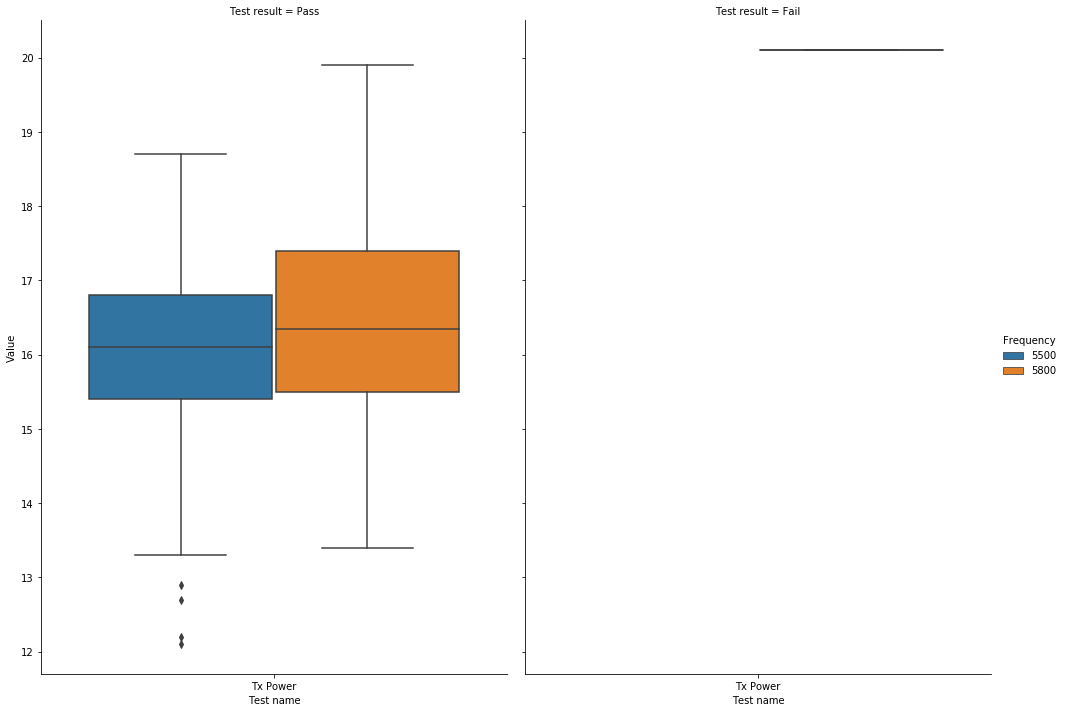

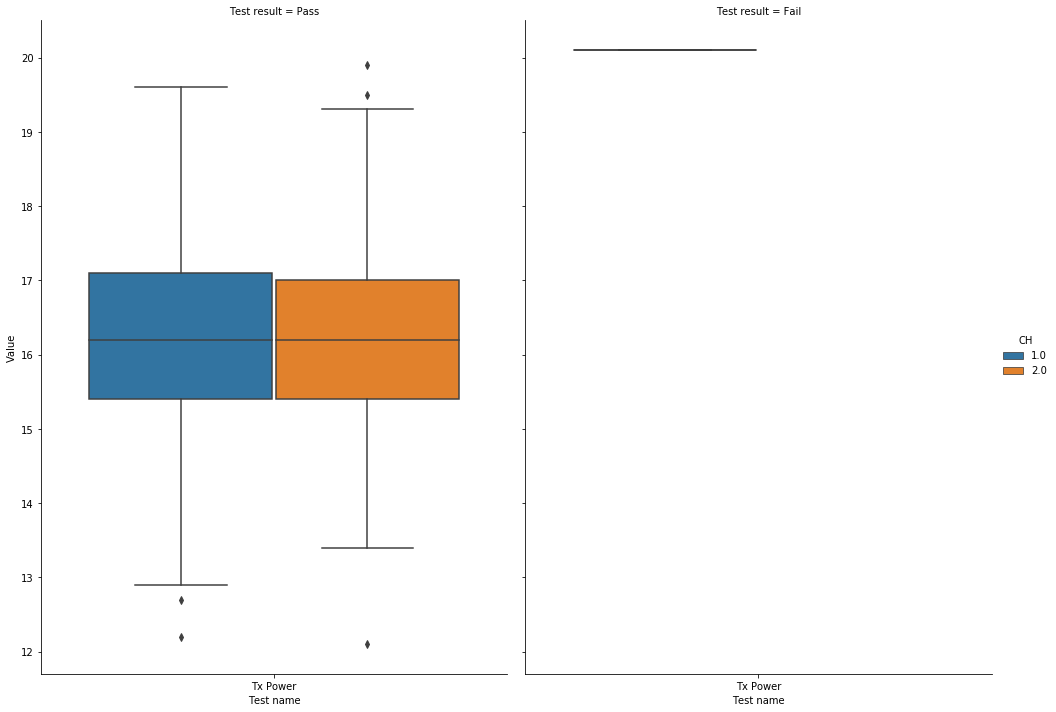

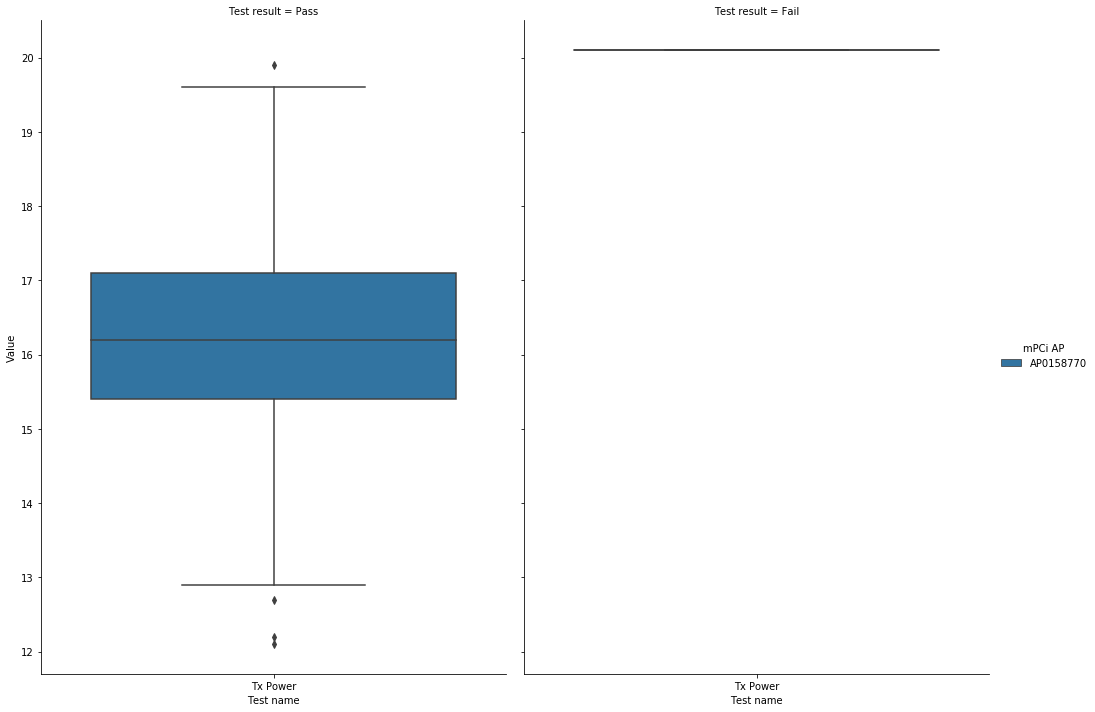

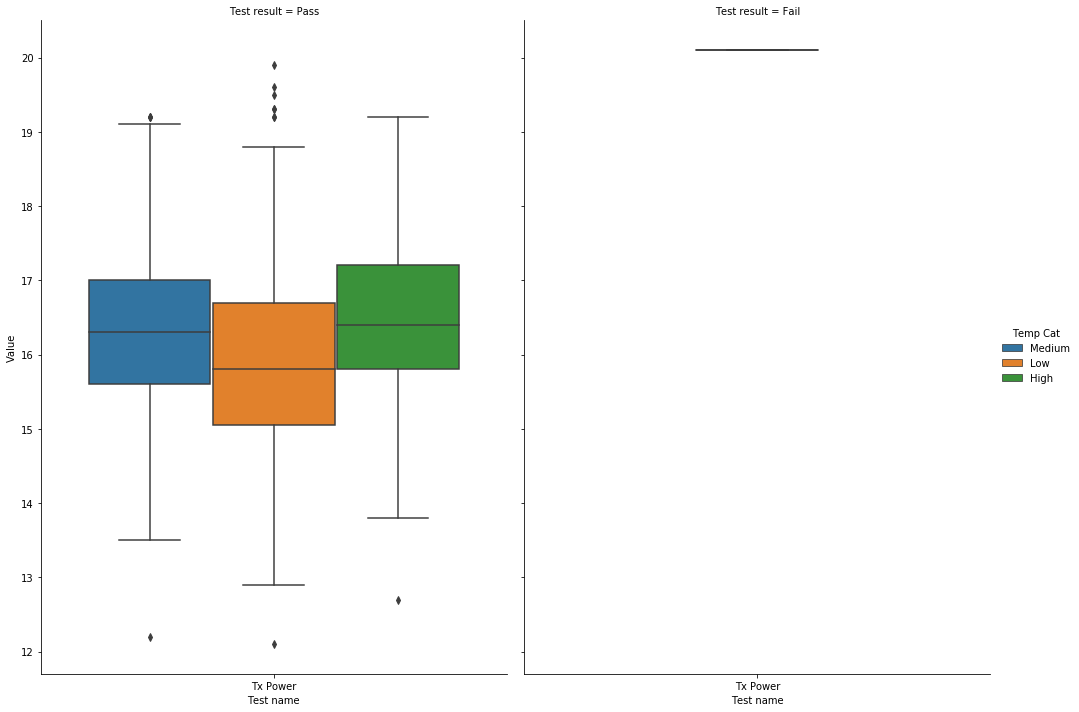

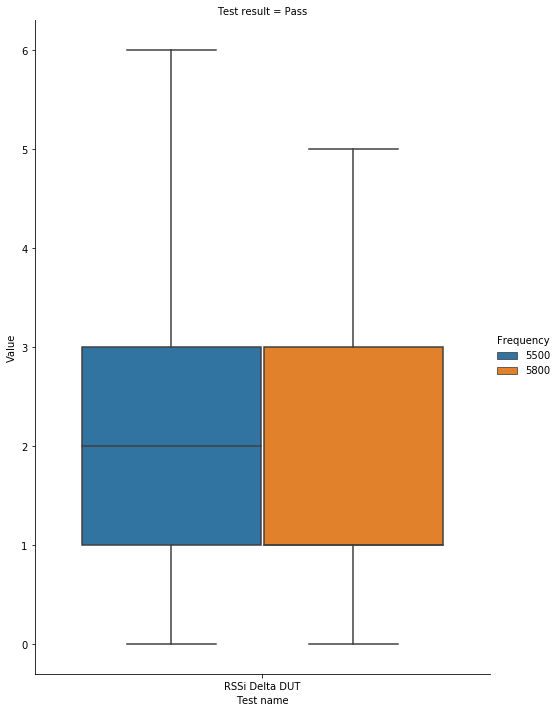

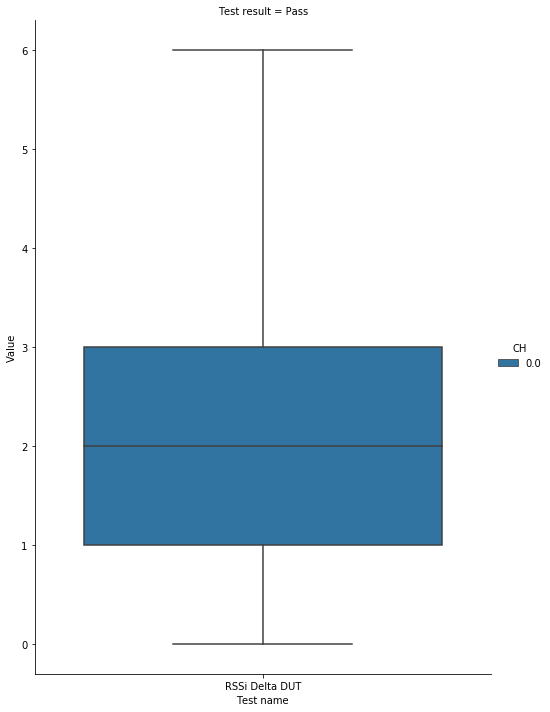

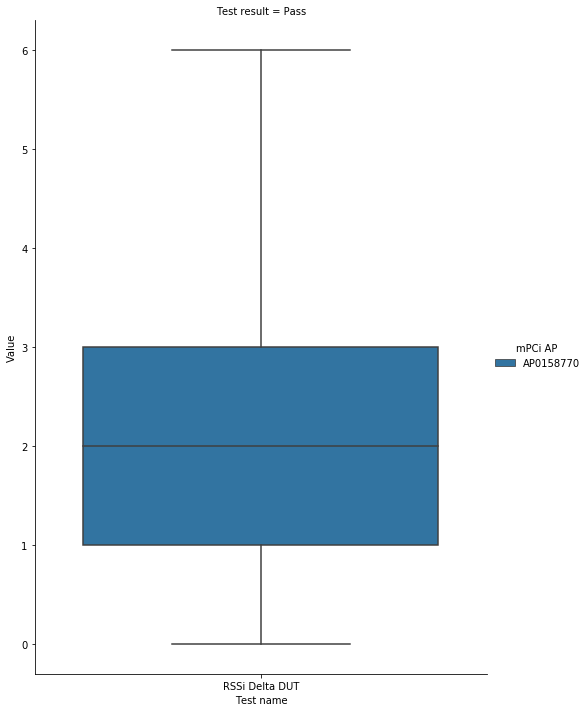

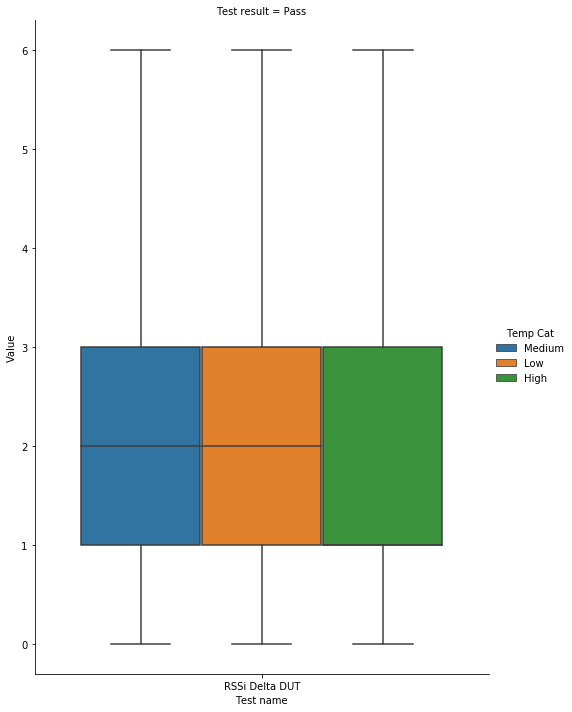

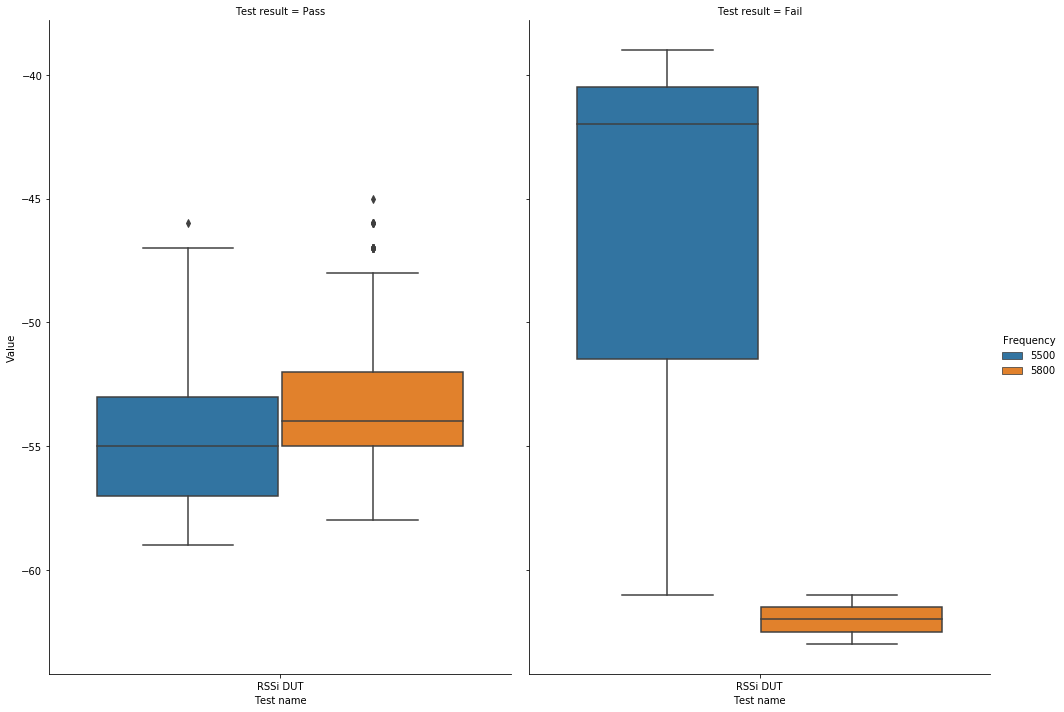

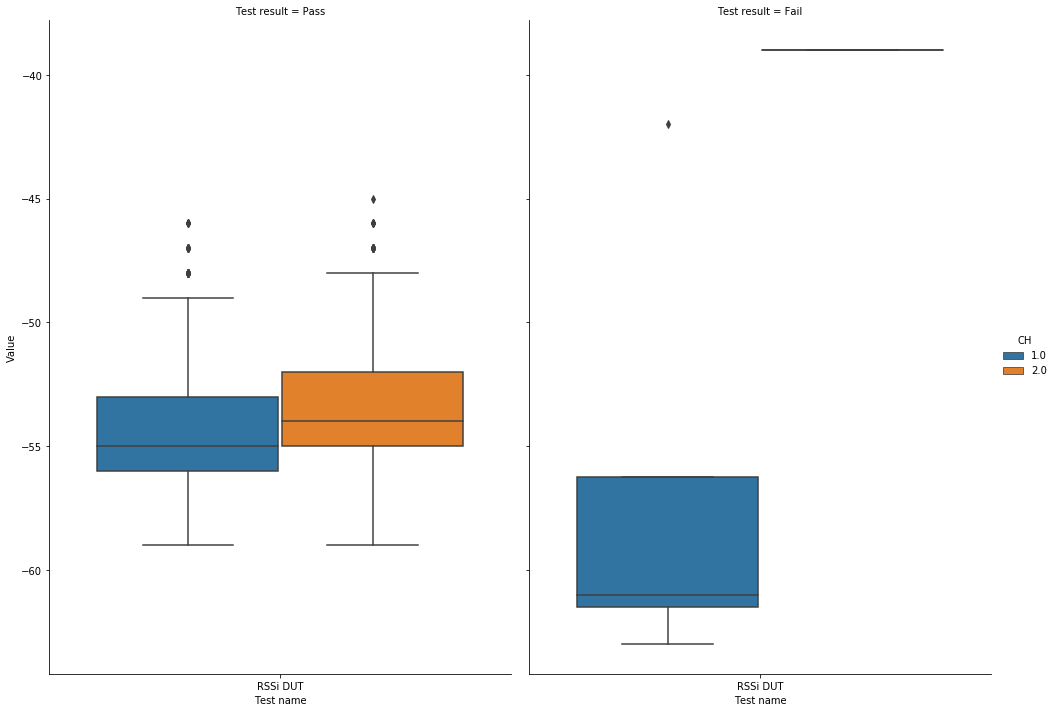

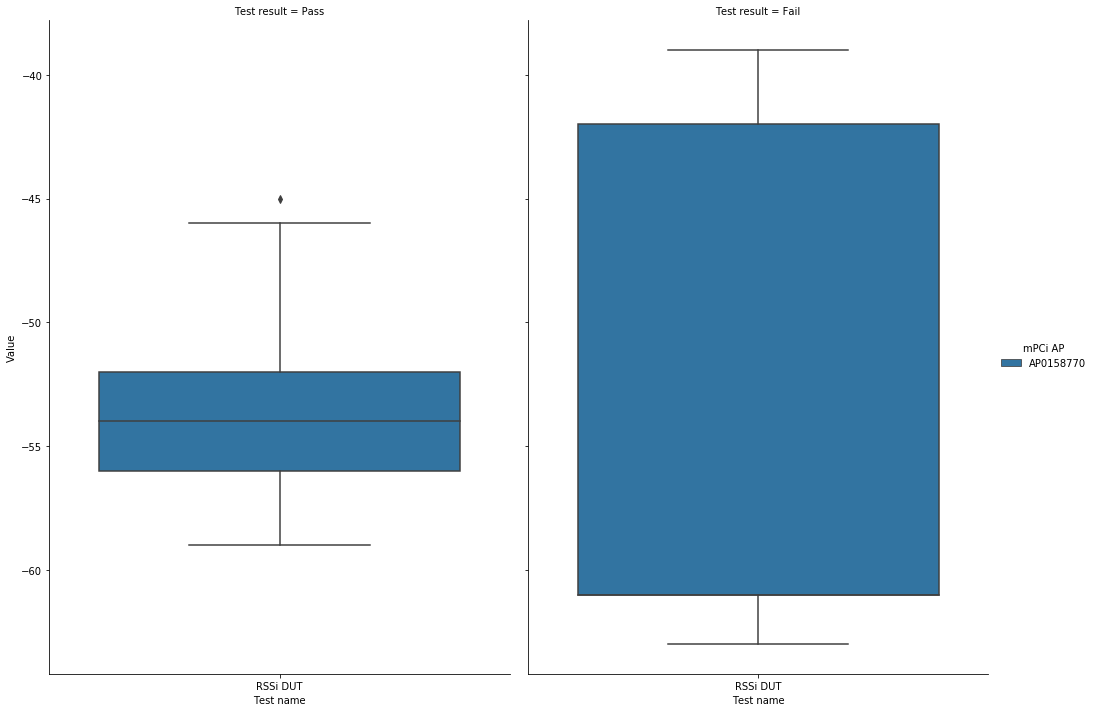

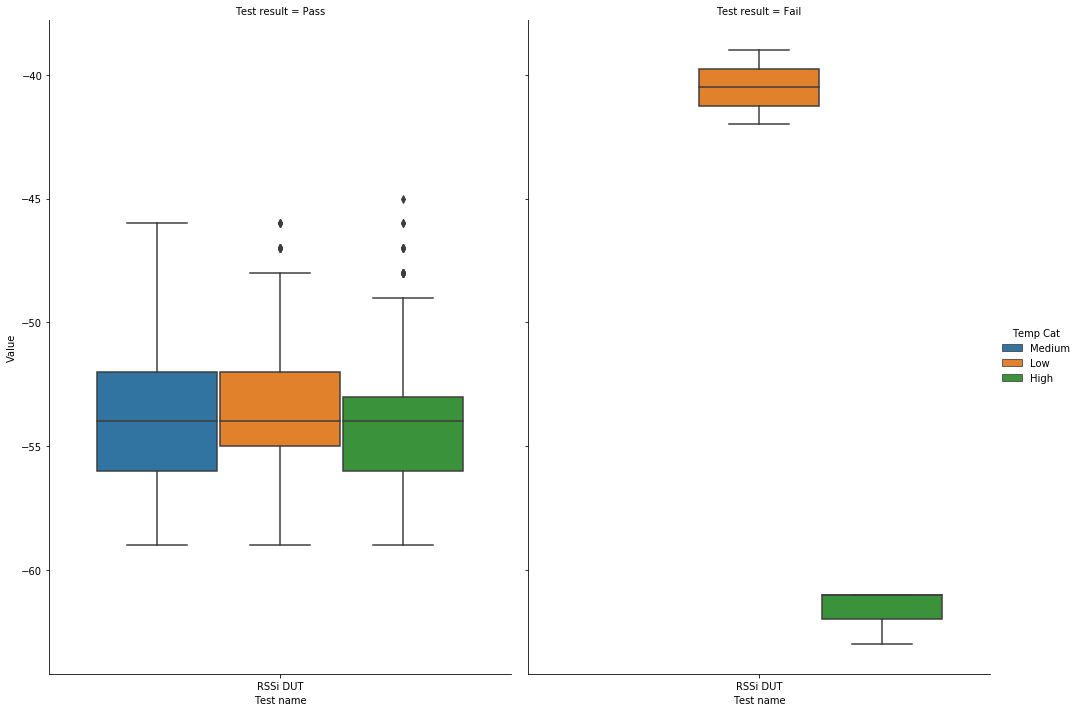

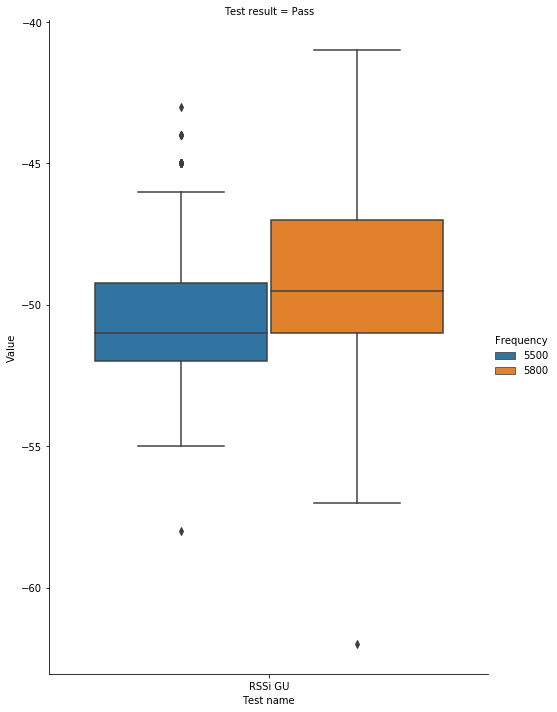

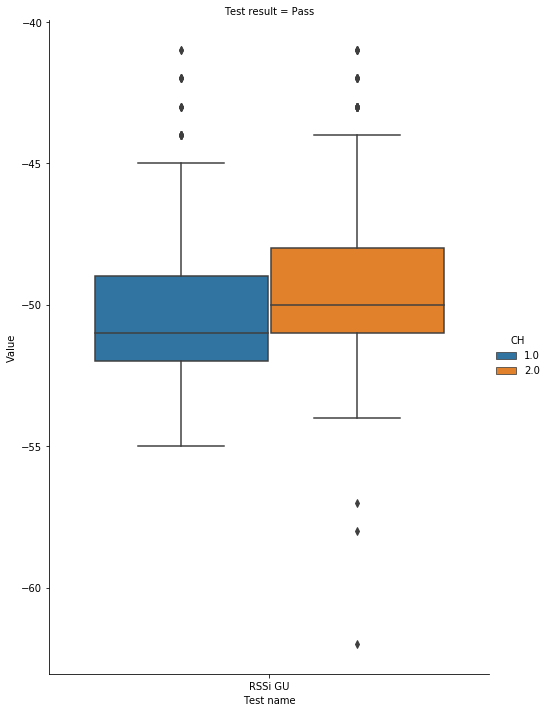

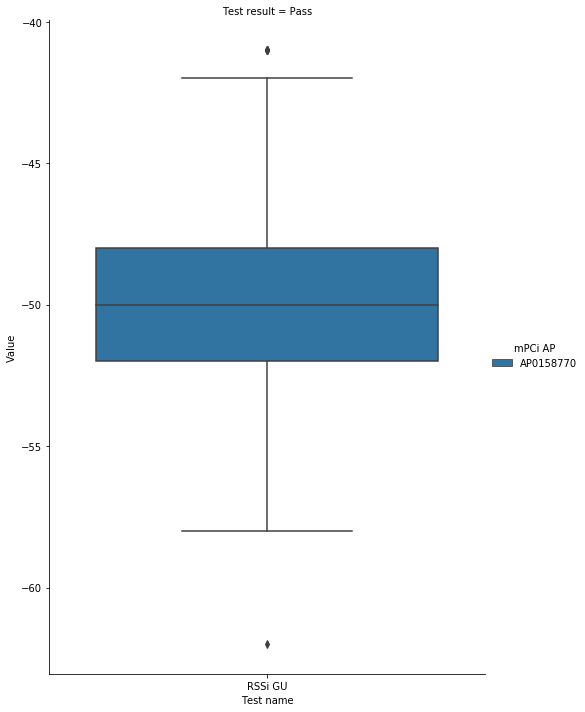

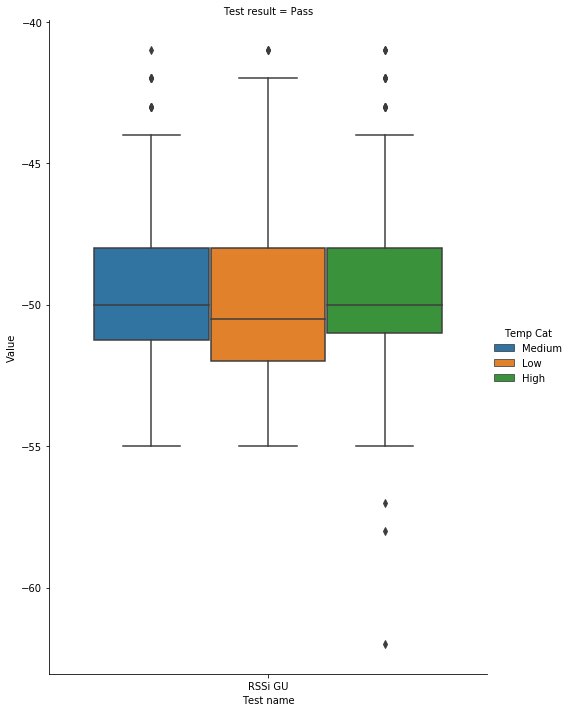

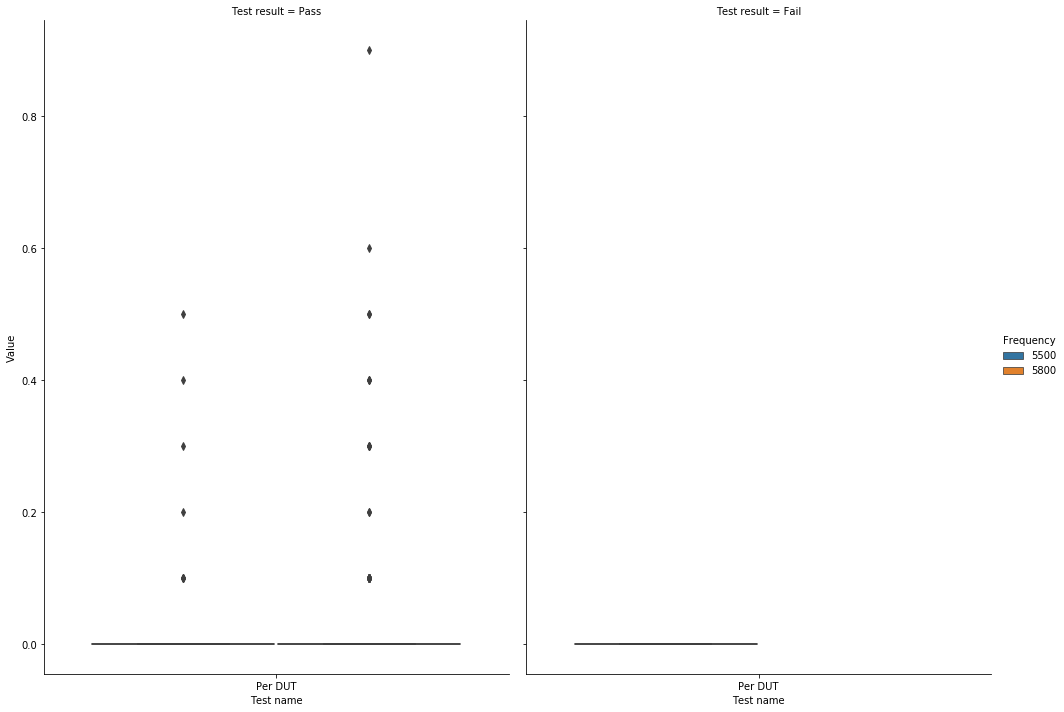

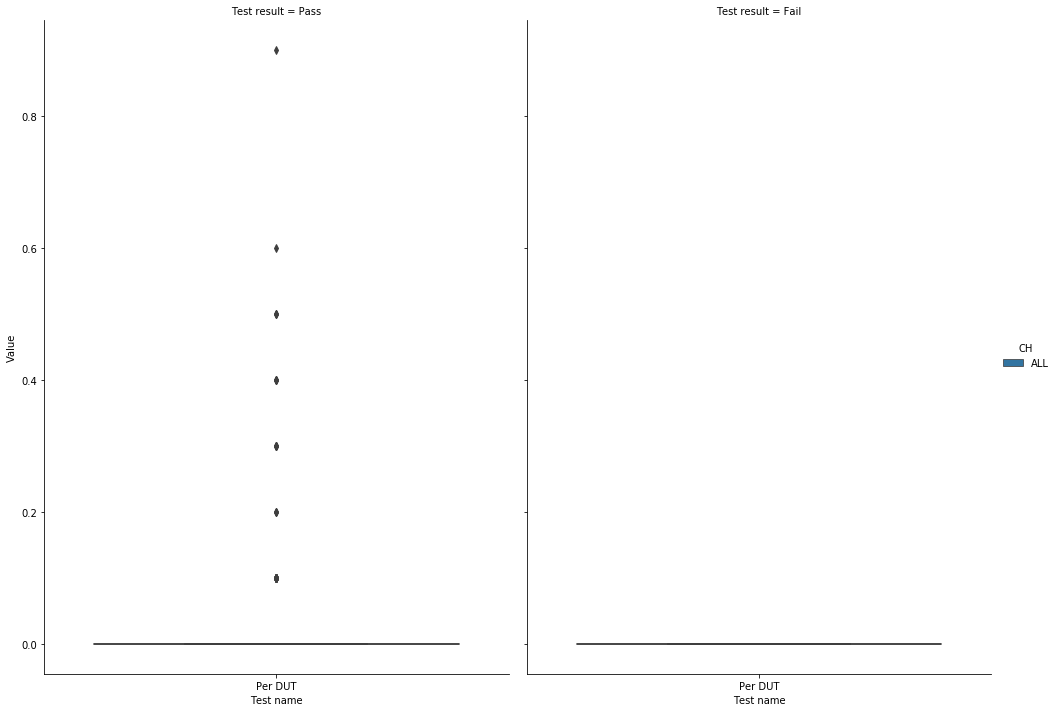

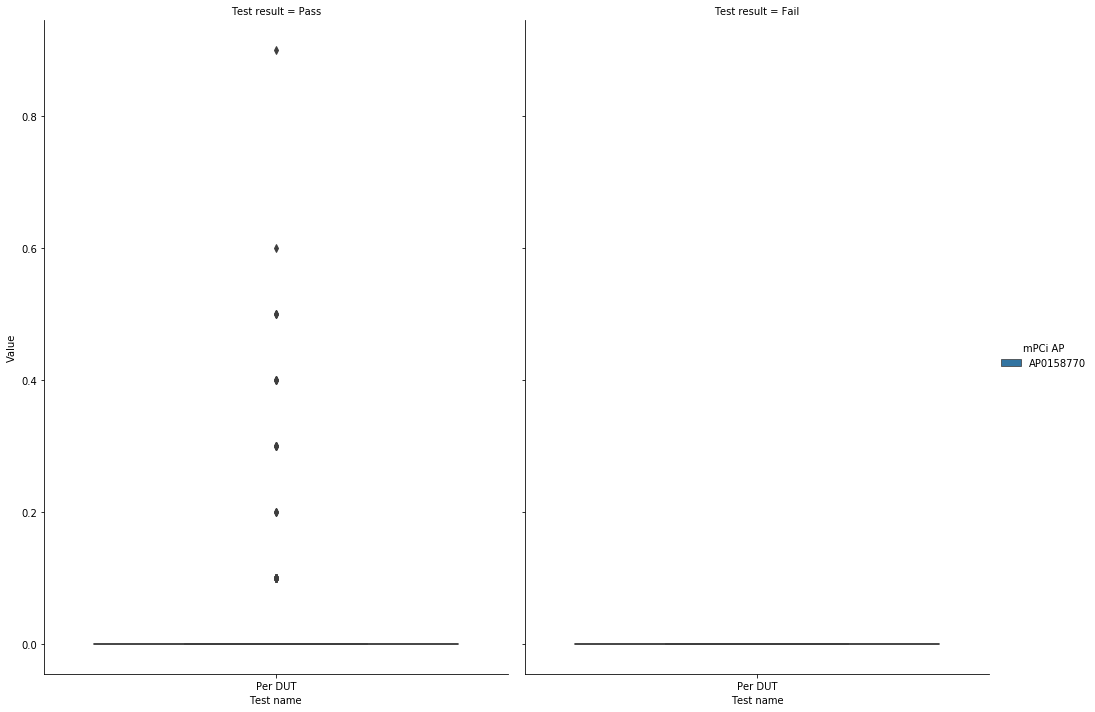

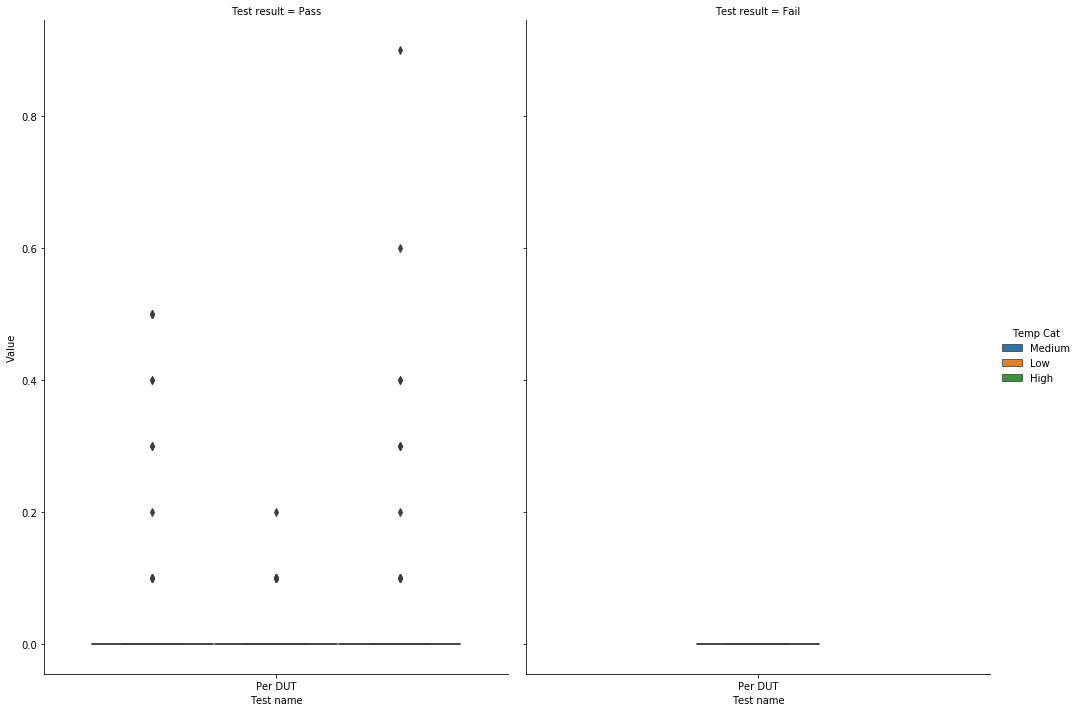

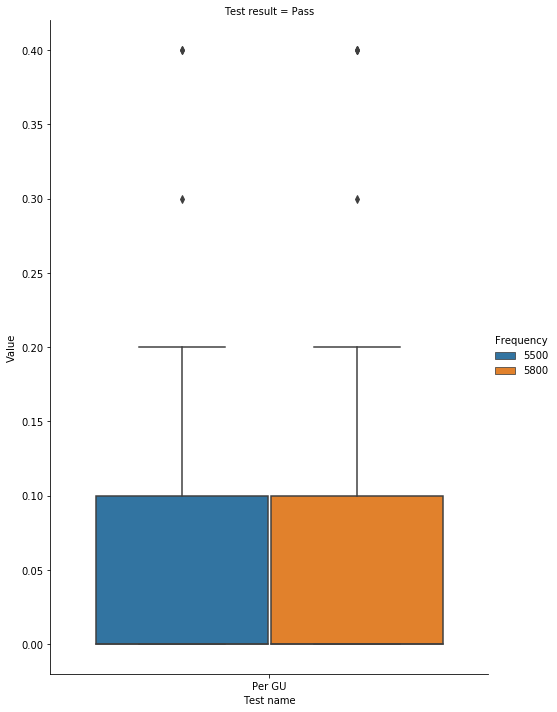

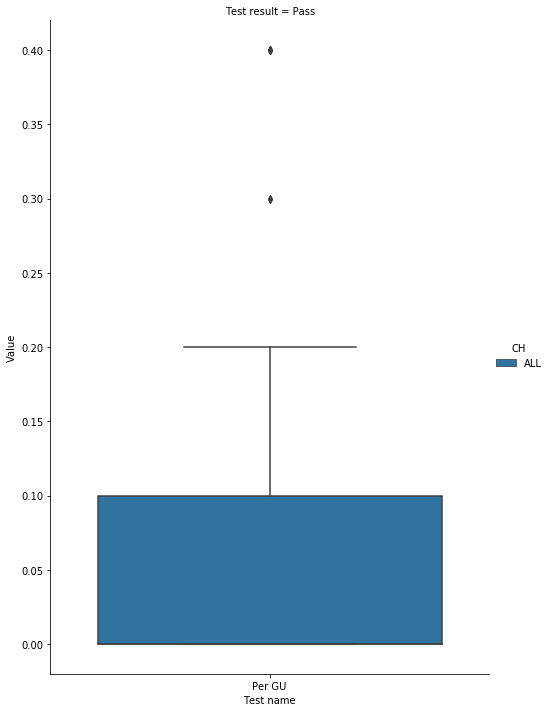

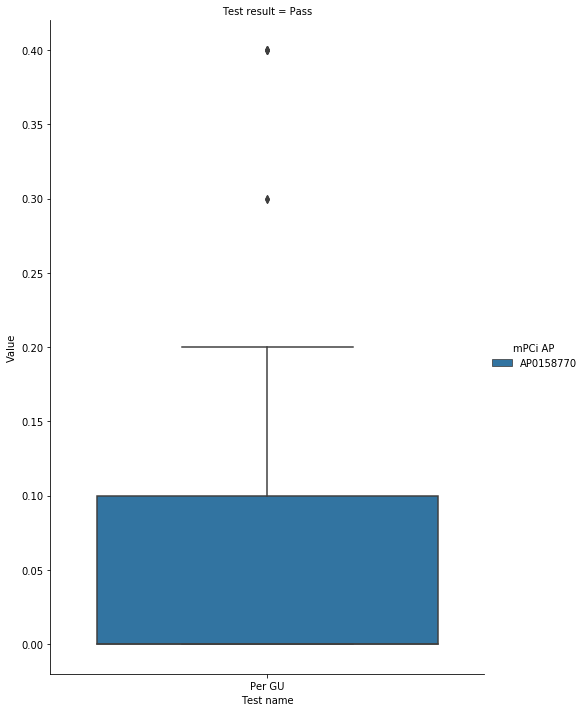

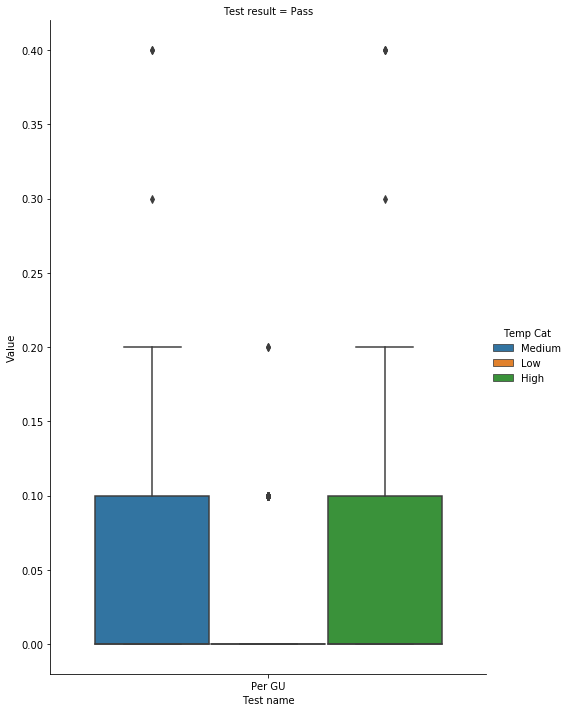

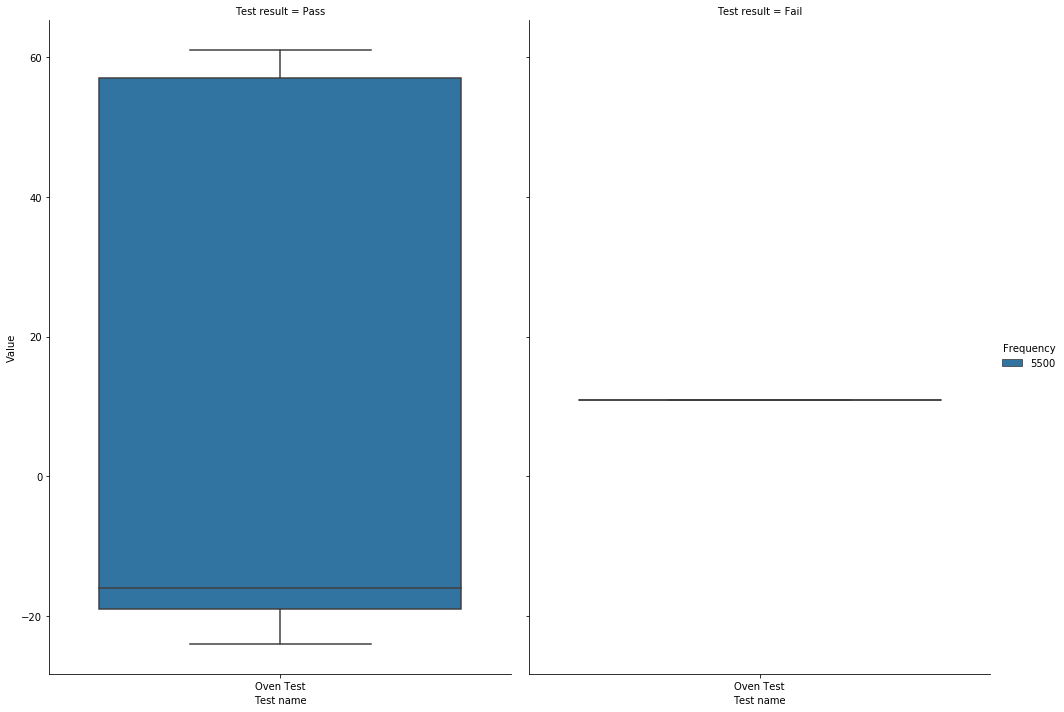

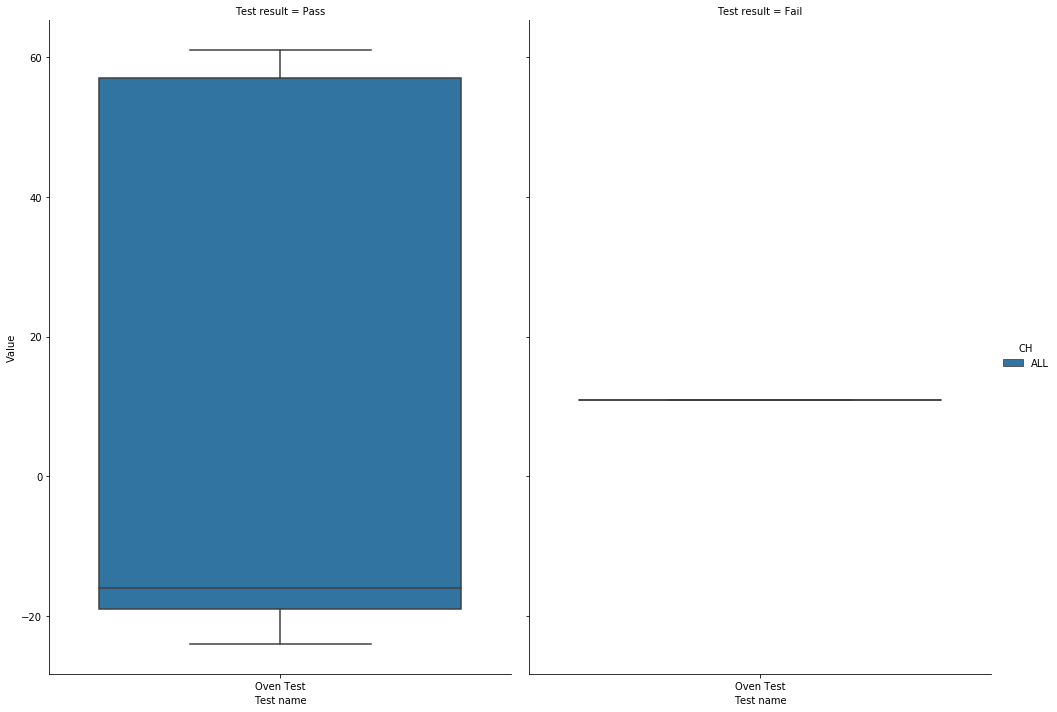

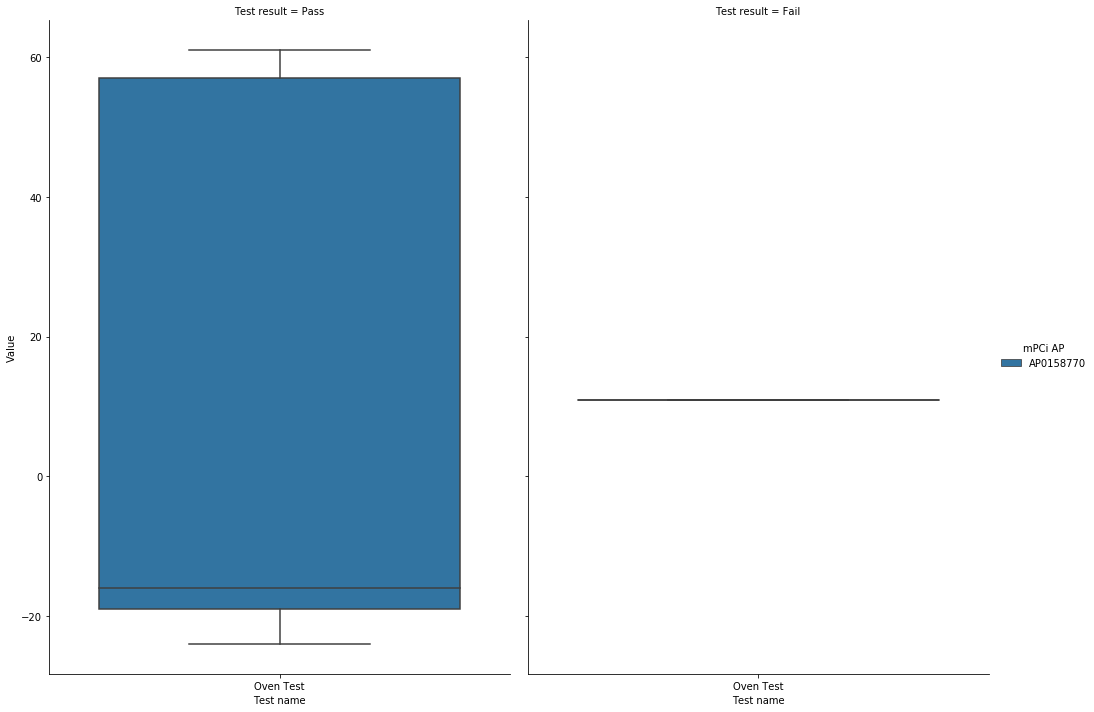

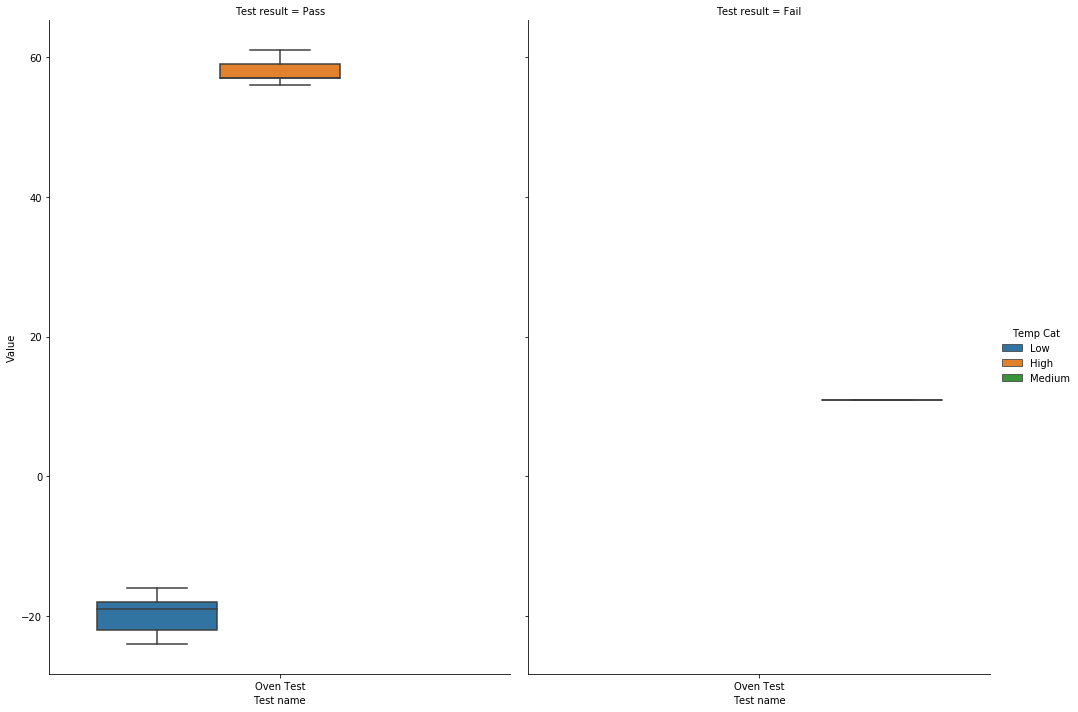

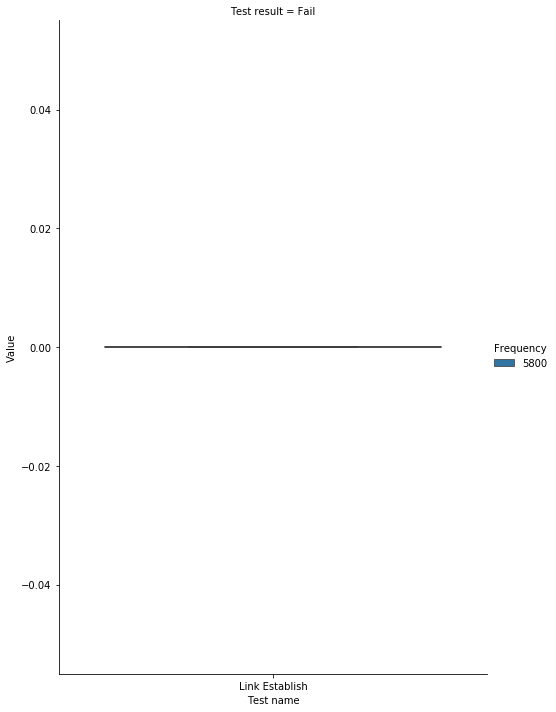

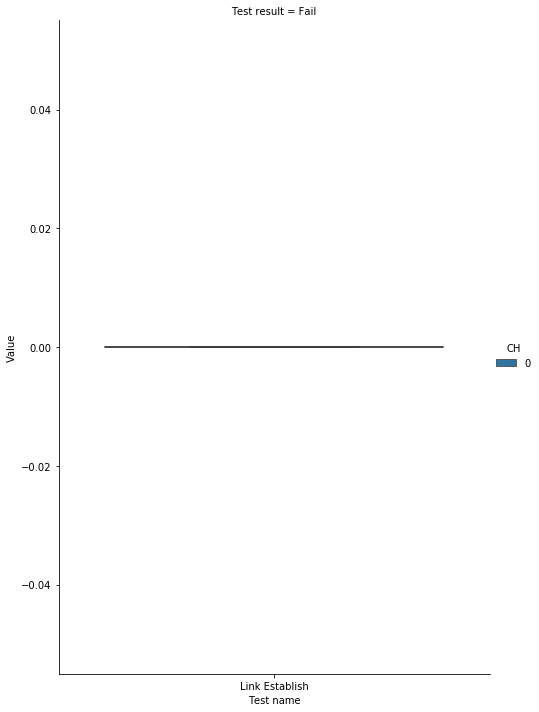

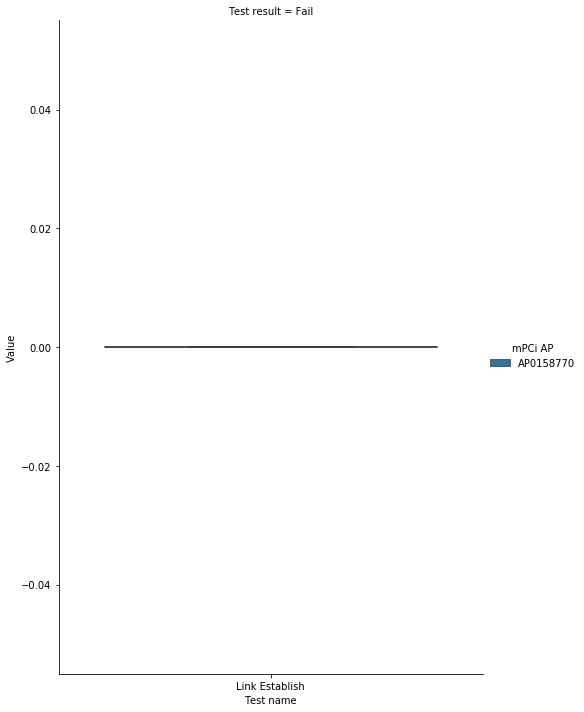

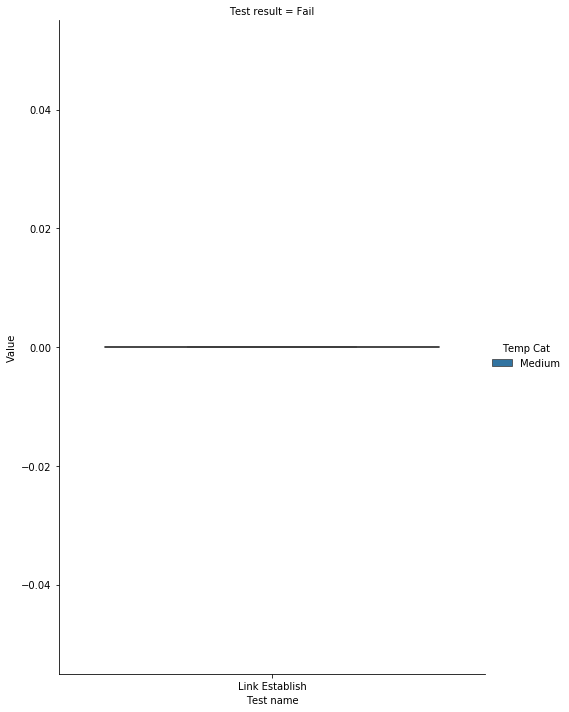

In [24]:
if (st=='CO2'):
    for testname in tests:
        for cat in CO2_cat:
            df_filter1=df_filter_num_norm[(df_filter_num_norm['Test name']==testname)]
            df_filter1.Value = df_filter1.Value.astype(float)
            g = sns.catplot(x='Test name', y="Value",hue=cat,col="Test result",data=df_filter1, kind="box",height=10, aspect=.7);
            
            
elif (st=='FUNCT'):
    for testname in tests:
        for cat in FUNCT_cat:
            df_filter1=df_filter_num_norm[(df_filter_num_norm['Test name']==testname)]
            df_filter1.Value = df_filter1.Value.astype(float)
            g = sns.catplot(x='Test name', y="Value",hue=cat,col="Test result",data=df_filter1, kind="box",height=10, aspect=.7);
            
    
elif (st=='ANTCAL'):
    for testname in tests:
        for cat in ANTCAL_cat:
            df_filter1=df_filter_num_norm[(df_filter_num_norm['Test name']==testname)]
            df_filter1.Value = df_filter1.Value.astype(float)
            g = sns.catplot(x='Test name', y="Value",hue=cat,col="Test result",data=df_filter1, kind="box",height=10, aspect=.7);
            
            
elif (st=='CAL'):
    for testname in tests:
        for cat in CAL_cat:
            df_filter1=df_filter_num_norm[(df_filter_num_norm['Test name']==testname)]
            df_filter1.Value = df_filter1.Value.astype(float)
            g = sns.catplot(x='Test name', y="Value",hue=cat,col="Test result",data=df_filter1, kind="box",height=10, aspect=.7);
            
            
elif (st=='SYSTEM'):
    for testname in tests:
        for cat in SYSTEM_cat:
            df_filter1=df_filter_num_norm[(df_filter_num_norm['Test name']==testname)]
            df_filter1.Value = df_filter1.Value.astype(float)
            g = sns.catplot(x='Test name', y="Value",hue=cat,col="Test result",data=df_filter1, kind="box",height=10, aspect=.7);

            
elif (st=='FTL'):
    for testname in tests:
        for cat in FTL_cat:
            df_filter1=df_filter_num_norm[(df_filter_num_norm['Test name']==testname)]
            df_filter1.Value = df_filter1.Value.astype(float)
            g = sns.catplot(x='Test name', y="Value",hue=cat,col="Test result",data=df_filter1, kind="box",height=10, aspect=.7);
            

# Distribution Analysis

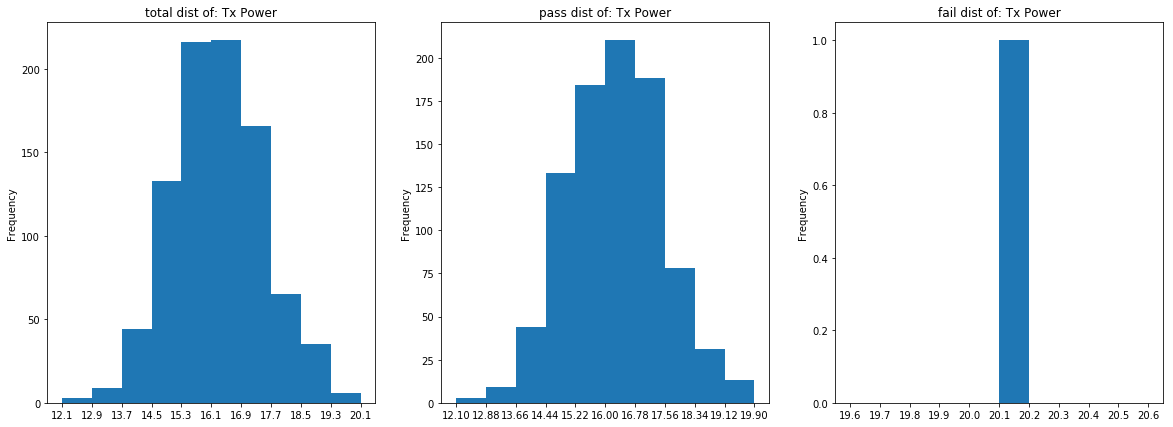

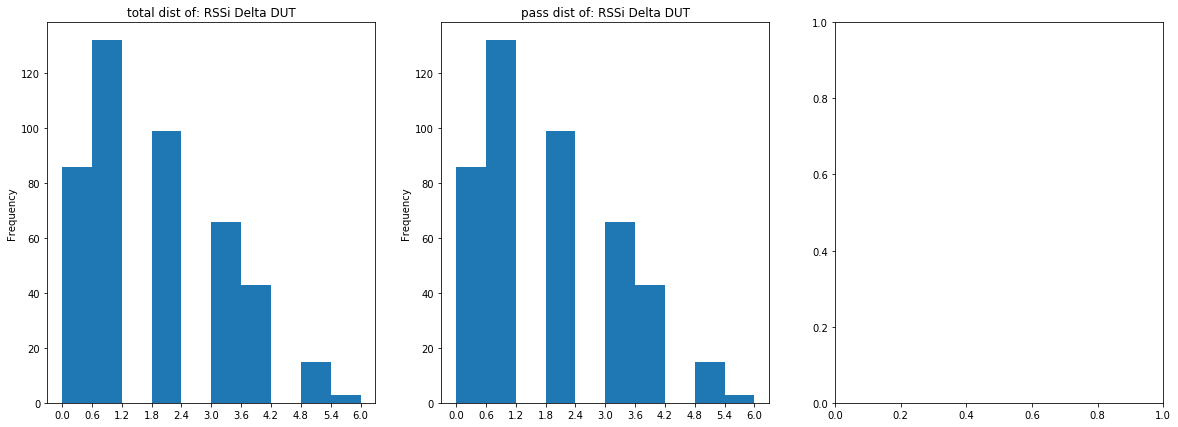

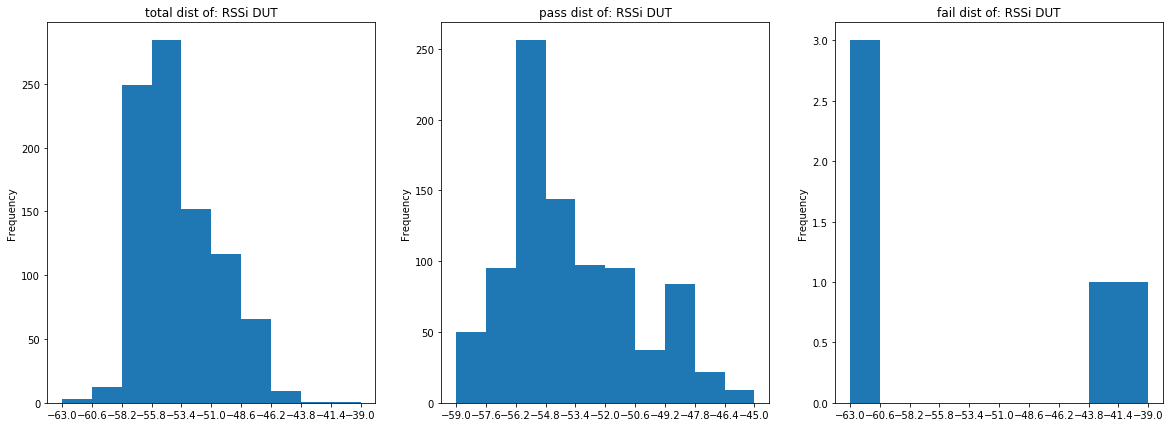

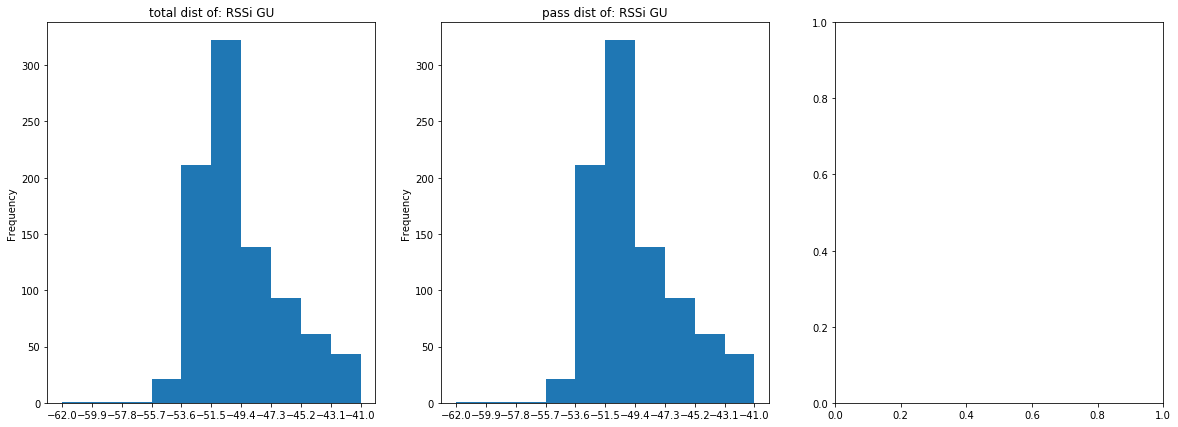

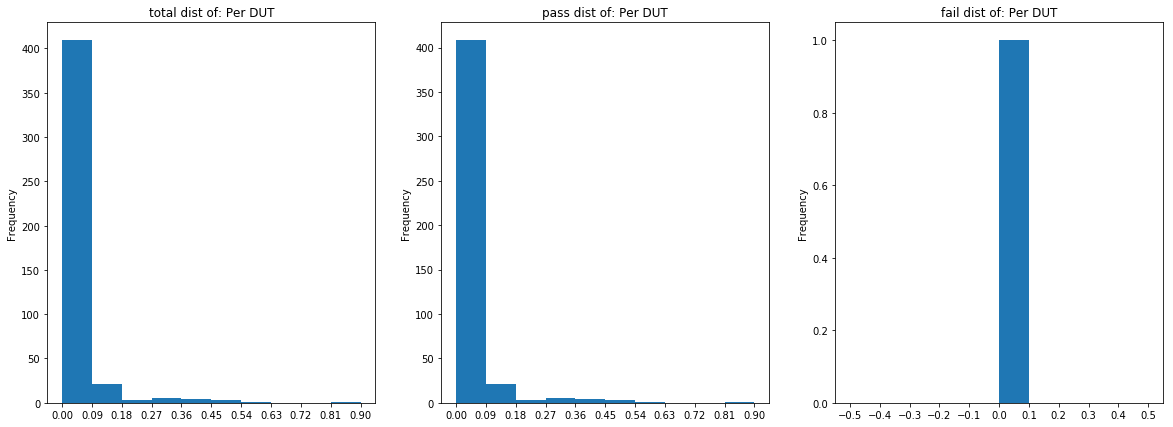

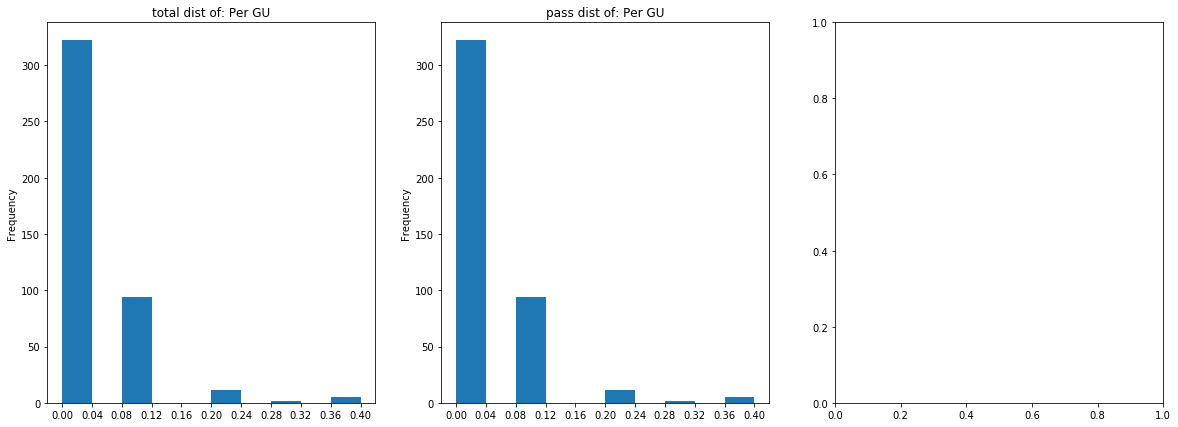

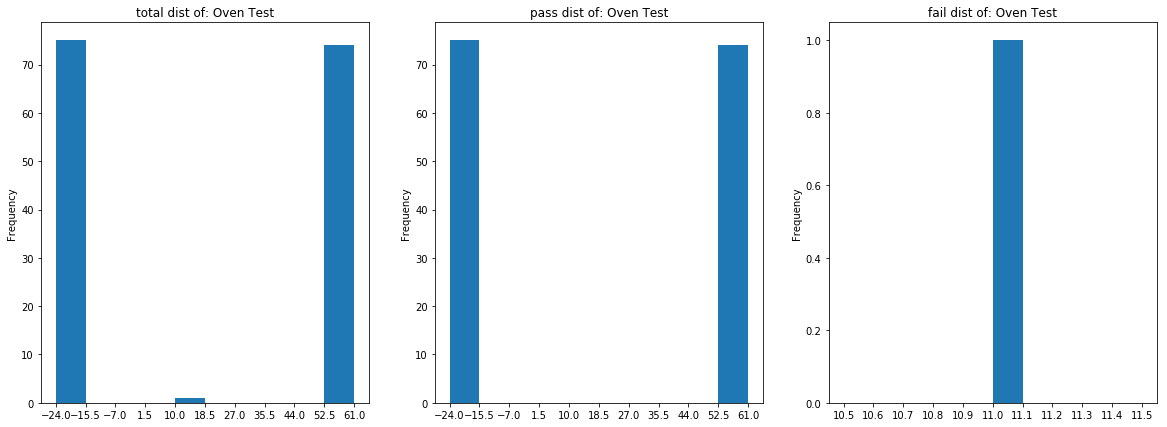

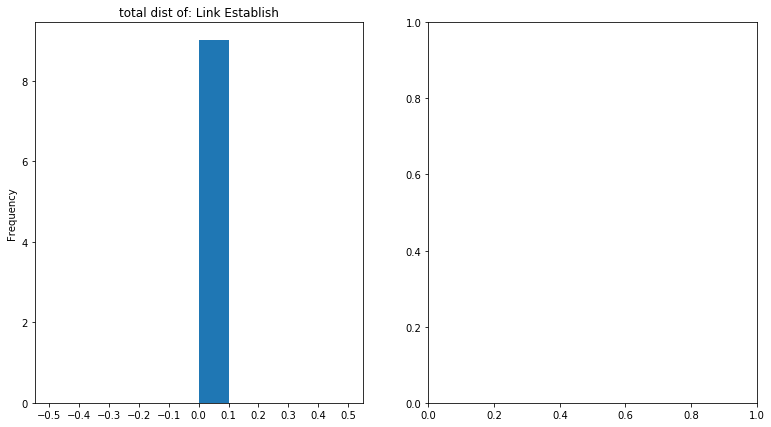

In [25]:
for test in tests:
    hist=df_filter_num_norm[(df_filter_num_norm['Test name']==test)]
    hist_pass=df_filter_num_norm[(df_filter_num_norm['Test name']==test)&(df_filter_num_norm['Test result']=='Pass')]
    hist_fail=df_filter_num_norm[(df_filter_num_norm['Test name']==test)&(df_filter_num_norm['Test result']=='Fail')]
    
    try:
        fig = plt.figure()

        ax1 = fig.add_subplot(1,3,1)
        count1, bin_edges1 = np.histogram(hist['Value'].astype(float))
        ax1 = hist['Value'].astype(float).plot(kind='hist', figsize=(20, 7), xticks=bin_edges1)
        ax1.set_title('total dist of: %s' %test)
        
        ax2 = fig.add_subplot(1,3,2)
        count2, bin_edges2 = np.histogram(hist_pass['Value'].astype(float))
        ax2 = hist_pass['Value'].astype(float).plot(kind='hist', figsize=(20, 7), xticks=bin_edges2)
        ax2.set_title('pass dist of: %s' %test)

        ax3 = fig.add_subplot(1,3,3)
        count3, bin_edges3 = np.histogram(hist_fail['Value'].astype(float))
        ax3 = hist_fail['Value'].astype(float).plot(kind='hist', figsize=(20, 7), xticks=bin_edges3)
        ax3.set_title('fail dist of: %s' %test)

    except:
        TypeError